In [1]:
import numpy as np
import os
import ast
from tqdm import tqdm
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import pickle

In [2]:
working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir)
data_dir = os.path.join(parent_dir, 'data')


data_hamiltonians_file = os.path.join(data_dir, 'hamiltonians.txt')


fullH_dir = os.path.join(data_dir, 'fullHamiltonians')
fullH_sub_JW_dir = os.path.join(fullH_dir, 'JW')


In [3]:
# Tapered Hamiltonians
with open(data_hamiltonians_file, 'r') as input_file:
    tapered_hamiltonians = ast.literal_eval(input_file.read())
    
tapered_H_size_qubits = {
                            mol_key: {'n_qubits': tapered_hamiltonians[mol_key][1],
                                      'n_terms': len(tapered_hamiltonians[mol_key][2])}
                            for mol_key in tapered_hamiltonians}
del tapered_hamiltonians

In [4]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <30}     No. terms:  {tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {tapered_H_size_qubits[key]['n_qubits']:<5.0f}")


H2-S1_STO-3G_singlet               No. terms:  6237     No.qubits:  18   
C1-O1_STO-3G_singlet               No. terms:  4409     No.qubits:  16   
H1-Cl1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H1-Na1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H2-Mg1_STO-3G_singlet              No. terms:  3540     No.qubits:  17   
H1-F1_3-21G_singlet                No. terms:  6852     No.qubits:  18   
H1-Li1_3-21G_singlet               No. terms:  6852     No.qubits:  18   
Be1_STO-3G_singlet                 No. terms:  102      No.qubits:  5    
H1-F1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H1-Li1_STO-3G_singlet              No. terms:  558      No.qubits:  8    
Ar1_STO-3G_singlet                 No. terms:  1465     No.qubits:  13   
F2_STO-3G_singlet                  No. terms:  2229     No.qubits:  15   
H1-O1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H2-Be1_STO-3G_singlet              No.

In [7]:
# Pre tapered Hamiltonians
data_pretap_hamiltonians_file = os.path.join(data_dir, 'Hamiltonians_pre_tapering.txt')
with open(data_pretap_hamiltonians_file, 'r') as input_file:
    NON_tapered_hamiltonians = ast.literal_eval(input_file.read())

NON_tapered_H_size_qubits = {
                            mol_key: {'n_qubits': len(list(NON_tapered_hamiltonians[mol_key].keys())[0]),
                                      'n_terms': len(NON_tapered_hamiltonians[mol_key])}
                            for mol_key in NON_tapered_hamiltonians}
del NON_tapered_hamiltonians

In [8]:
for key in NON_tapered_H_size_qubits.keys():
    print(f"{key: <60}     No. terms:  {NON_tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {NON_tapered_H_size_qubits[key]['n_qubits']:<5.0f}")

Ne1_STO-3G_singlet_NeNe                                          No. terms:  156      No.qubits:  10   
O2_STO-3G_triplet_O2O2                                           No. terms:  3075     No.qubits:  20   
Na1_STO-3G_doublet_NaNa                                          No. terms:  3340     No.qubits:  18   
H2-C2_STO-3G_singlet_EthyneEthyne                                No. terms:  6401     No.qubits:  24   
H1-N1-O3_STO-3G_singlet_HNO3HNO3                                 No. terms:  280136   No.qubits:  42   
H1-F1_3-21G_singlet_HF_3-21GHF_3-21G                             No. terms:  13958    No.qubits:  22   
Cl1_STO-3G_doublet_ClCl                                          No. terms:  2092     No.qubits:  18   
H2-C1-O1_STO-3G_singlet_MethanalMethanal                         No. terms:  9257     No.qubits:  24   
P1_STO-3G_quartet_PP                                             No. terms:  3388     No.qubits:  18   
H2-O1_3-21G_singlet_H2O_3-21GH2O_3-21G                          

In [9]:
# molecule names in hamiltonians and hamiltonians before tapering are different
# requires using regular expressions to select correct terms
# done below (code replaces pre-tapered hamiltonian names with naming done by Will!)

import re
pre_tap_hamiltonians_relevent={}
for mol_name_PreT in NON_tapered_H_size_qubits:
    for mol_name in tapered_H_size_qubits.keys():
        if bool(re.match(f'^{mol_name}.*$', mol_name_PreT)): # NO wildcard at front. Wildcard at end
            pre_tap_hamiltonians_relevent[mol_name] = NON_tapered_H_size_qubits[mol_name_PreT]

In [10]:
pre_tap_hamiltonians_relevent

{'Ne1_STO-3G_singlet': {'n_qubits': 10, 'n_terms': 156},
 'H1-F1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 13958},
 'H1-F1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'Mg1_STO-3G_singlet': {'n_qubits': 18, 'n_terms': 3388},
 'H3_3-21G_singlet_1+': {'n_qubits': 12, 'n_terms': 1501},
 'H2-S1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 6246},
 'O2_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 2255},
 'H1-Li1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'H2-Be1_STO-3G_singlet': {'n_qubits': 14, 'n_terms': 666},
 'H1-Li1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 8758},
 'H1-Na1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5851},
 'H4-N1_STO-3G_singlet_1+': {'n_qubits': 18, 'n_terms': 6892},
 'H2-Mg1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 4582},
 'H1-He1_STO-3G_singlet': {'n_qubits': 4, 'n_terms': 27},
 'C1-O1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5475},
 'H3-N1_STO-3G_singlet': {'n_qubits': 16, 'n_terms': 4293},
 'H3_STO-3G_singlet_1+': {'n_qubits': 6, 'n_ter

In [11]:
sorted(list(pre_tap_hamiltonians_relevent.keys())) == sorted(list(tapered_H_size_qubits.keys()))

True

In [12]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <25}     No. terms original:  {pre_tap_hamiltonians_relevent[key]['n_terms']:<6.0f}   No. terms tapering:  {tapered_H_size_qubits[key]['n_terms']:<5.0f}")

H2-S1_STO-3G_singlet          No. terms original:  6246     No. terms tapering:  6237 
C1-O1_STO-3G_singlet          No. terms original:  5475     No. terms tapering:  4409 
H1-Cl1_STO-3G_singlet         No. terms original:  8159     No. terms tapering:  4409 
H1-Na1_STO-3G_singlet         No. terms original:  5851     No. terms tapering:  4409 
H2-Mg1_STO-3G_singlet         No. terms original:  4582     No. terms tapering:  3540 
H1-F1_3-21G_singlet           No. terms original:  13958    No. terms tapering:  6852 
H1-Li1_3-21G_singlet          No. terms original:  8758     No. terms tapering:  6852 
Be1_STO-3G_singlet            No. terms original:  156      No. terms tapering:  102  
H1-F1_STO-3G_singlet          No. terms original:  631      No. terms tapering:  558  
H1-Li1_STO-3G_singlet         No. terms original:  631      No. terms tapering:  558  
Ar1_STO-3G_singlet            No. terms original:  2092     No. terms tapering:  1465 
F2_STO-3G_singlet             No. terms ori

# Import Myriad Results

In [106]:
prune_threshold = 1e-6

In [107]:
## import LCU results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_LCU_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('LCU_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[40:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_CS_VQE_LCU_results[mol_name] = data

In [108]:
### PRUNE LCU Hamiltonians

for mol_key in list(myriad_CS_VQE_LCU_results.keys()):
    for ind_key in myriad_CS_VQE_LCU_results[mol_key]:
        if isinstance(ind_key, str):
            continue
        else:
            H_LCU_dict = myriad_CS_VQE_LCU_results[mol_key][ind_key]['H']
            H_LCU_pruned = {P_key: coeff.real for P_key, coeff in H_LCU_dict.items() if np.abs(coeff)>prune_threshold}
            myriad_CS_VQE_LCU_results[mol_key][ind_key]['H'] = H_LCU_pruned

In [109]:
myriad_CS_VQE_LCU_results.keys()

dict_keys(['H1-Li1_STO-3G_singlet', 'H1-Li1-O1_STO-3G_singlet', 'C1-O1_STO-3G_singlet', 'H2-Mg1_STO-3G_singlet', 'F2_STO-3G_singlet', 'H1-F1_3-21G_singlet', 'N2_STO-3G_singlet', 'H1-Na1_STO-3G_singlet', 'Be1_STO-3G_singlet', 'Mg1_STO-3G_singlet', 'H2-O1_STO-3G_singlet', 'H1-Cl1_STO-3G_singlet', 'H1-Li1_3-21G_singlet', 'H4-N1_STO-3G_singlet_1+', 'H1-F1_STO-3G_singlet', 'H3_STO-3G_singlet_1+', 'H3-N1_STO-3G_singlet', 'H4-C1_STO-3G_singlet', 'H2-Be1_STO-3G_singlet', 'O2_STO-3G_singlet', 'H3_3-21G_singlet_1+', 'H2_6-31G_singlet', 'H1-He1_3-21G_singlet_1+', 'H2-S1_STO-3G_singlet', 'H2_3-21G_singlet', 'H1-O1_STO-3G_singlet'])

In [110]:
## import SeqRot results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_SeqRot_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('SeqRot_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[43:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)
        myriad_CS_VQE_SeqRot_results[mol_name] = data

In [111]:
### PRUNE SeqRot Hamiltonians

for mol_key in list(myriad_CS_VQE_SeqRot_results.keys()):
    for ind_key in myriad_CS_VQE_SeqRot_results[mol_key]:
        if isinstance(ind_key, str):
            continue
        else:
            H_SeqRot_dict = myriad_CS_VQE_SeqRot_results[mol_key][ind_key]['H']
            H_SeqRot_pruned = {P_key: coeff.real for P_key, coeff in H_SeqRot_dict.items() if np.abs(coeff)>prune_threshold}
            myriad_CS_VQE_SeqRot_results[mol_key][ind_key]['H'] = H_SeqRot_pruned

In [112]:
sorted(list(myriad_CS_VQE_SeqRot_results.keys())) == sorted(list(myriad_CS_VQE_LCU_results.keys()))

True

In [113]:
myriad_CS_VQE_SeqRot_results['H2-Be1_STO-3G_singlet'][1]

{'E': -19.052461923533848,
 'H': {'I': -18.449311216657115,
  'Z': -0.597382175022161,
  'X': 0.08321846052224319}}

In [114]:
myriad_CS_VQE_SeqRot_results['H2-Be1_STO-3G_singlet'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'exp_conditions'])

# Unitary Partitioning Results - with pruning

In [122]:
## import LCU results
new_res_dir = os.path.join(working_dir, 'NewUnitaryPartitioning_results_with_pruning')
results_dir = os.path.join(new_res_dir, 'UP_LCU_ontop_CSVQE_results')

myriad_UP_LCU_on_CSVQE_LCU = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_LCU_CS_VQE_LCU')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[65:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_UP_LCU_on_CSVQE_LCU[mol_name] = data[mol_name]

In [123]:
myriad_UP_LCU_on_CSVQE_LCU['H3_3-21G_singlet_1+'][1]

{'AC_sets': {0: [-2.396760291393644 []],
  1: [0.7483743298548716 [Z0], 0.08999926132008447 [X0]]},
 'E': -3.1505268365678702}

In [124]:
## import SeqRot results
new_res_dir = os.path.join(working_dir, 'NewUnitaryPartitioning_results_with_pruning')
results_dir_SeqRot = os.path.join(new_res_dir, 'UP_SeqRot_ontop_CS_VQE_results')

subfolders = [ (f.path, f.name) for f in os.scandir(results_dir_SeqRot) if f.is_dir() ]

In [147]:
myriad_UP_SeqRot_on_CSVQE_SeqRot = {}
for file_dir_path, mol_name in subfolders:
    results={}
    for filename in os.listdir(file_dir_path):
        file_number = int(re.findall('[0-9]+', filename[-10:])[0]) # finds numbers in last 10 characters
        if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_SeqRot_CS_VQE')):
            file_path = os.path.join(file_dir_path, filename) 
            with open(file_path,'rb') as infile:
                data = pickle.load(infile)
                
            if not list(data[mol_name].keys())[0] == file_number:
                raise ValueError('incorrect key')
            results[file_number] = list(data[mol_name].values())[0]
            
    myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name] = results

In [148]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H3_3-21G_singlet_1+'][0]

{'AC_sets': {}, 'E': -3.145134621248515}

# Plot Results

In [254]:
def plot_n_terms_and_error(non_tapered_H_dict, tapered_H_dict, CS_VQE_LCU_dict, CS_VQE_SeqRot_dict,
                           UP_LCU_on_LCU_CSVQE_dict, UP_SeqRot_on_SeqRot_CSVQE_dict,
                           mol_name,  dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    # mol_dict = list of lists of anticommuting sets and standard contextual H
    # paper_results_dict =  CS-VQE paper results dict
    # Nterms_H_dict = dict of number of terms in each molecular hamiltonian without any method applied!
    
    ## get total number of terms for each reduction
    
    True_gs_energy = CS_VQE_LCU_dict[mol_name]['exp_conditions']['true_gs']
    
    
    # Get no. terms and energy error
    
    CS_VQE_SeqRot_terms = []
    CS_VQE_SeqRot_error=[]
    
    CS_VQE_LCU_terms = []
    CS_VQE_LCU_error =[]
    
    UP_SeqRot_ontop_CS_VQE_SeqRot_terms =[]
    UP_SeqRot_ontop_CS_VQE_SeqRot_error=[]
    
    UP_LCU_ontop_CS_VQE_LCU_terms =[]
    UP_LCU_ontop_CS_VQE_LCU_error=[]
    
    for ind in sorted(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name].keys()):
        UP_SeqRot_terms = len(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][ind]['AC_sets'])
        UP_SeqRot_ontop_CS_VQE_SeqRot_terms.append(UP_SeqRot_terms)
        UP_SeqRot_E = UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][ind]['E']
        UP_SeqRot_error = abs(True_gs_energy-UP_SeqRot_E)
        UP_SeqRot_ontop_CS_VQE_SeqRot_error.append(UP_SeqRot_error)
        
        UP_LCU_terms = len(UP_LCU_on_LCU_CSVQE_dict[mol_name][ind]['AC_sets'])
        UP_LCU_ontop_CS_VQE_LCU_terms.append(UP_LCU_terms)
        UP_LCU_E = UP_LCU_on_LCU_CSVQE_dict[mol_name][ind]['E']
        UP_LCU_error = abs(True_gs_energy-UP_LCU_E)
        UP_LCU_ontop_CS_VQE_LCU_error.append(UP_LCU_error)
        
        CSVQE_LCU_terms = len(CS_VQE_LCU_dict[mol_name][ind]['H'])
        CS_VQE_LCU_terms.append(CSVQE_LCU_terms)
        CSVQE_LCU_E = CS_VQE_LCU_dict[mol_name][ind]['E']
        CSVQE_LCU_error = abs(True_gs_energy-CSVQE_LCU_E)
        CS_VQE_LCU_error.append(CSVQE_LCU_error)
        
        CSVQE_SeqRot_terms = len(CS_VQE_SeqRot_dict[mol_name][ind]['H'])
        CS_VQE_SeqRot_terms.append(CSVQE_SeqRot_terms)
        CSVQE_SeqRot_E = CS_VQE_SeqRot_dict[mol_name][ind]['E']
        CSVQE_SeqRot_error = abs(True_gs_energy-CSVQE_SeqRot_E)
        CS_VQE_SeqRot_error.append(CSVQE_SeqRot_error)
    
    n_qubits = np.array([i for i in range(len(UP_LCU_ontop_CS_VQE_LCU_terms))]) # labels
    
    width = 0.2  # the width of the bars
    offset = 0.125 # offset on x axis
    
    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - (offset+width), CS_VQE_SeqRot_terms, width, label='CS_VQE_SeqRot',color="yellowgreen")
    rects2 = ax.bar(n_qubits - offset, CS_VQE_LCU_terms, width, label='CS_VQE_LCU',color="royalblue")
    rects3 = ax.bar(n_qubits + offset, UP_SeqRot_ontop_CS_VQE_SeqRot_terms, width, label='UP_SeqRot_ontop_CSVQE',color="crimson")
    rects4 = ax.bar(n_qubits + (offset+width), UP_LCU_ontop_CS_VQE_LCU_terms, width, label='UP_LCU_ontop_CSVQE',color="darkorchid")

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

    tapered_N_terms = tapered_H_dict[mol_name]['n_terms']
    tapered_N_qubits = tapered_H_dict[mol_name]['n_qubits']
    rects5 = ax.bar(tapered_N_qubits + (offset+2*width), tapered_N_terms, width, label='tapered H',color="darkorange")
    
    pre_tapered_N_terms = non_tapered_H_dict[mol_name]['n_terms']
    pre_tapered_N_qubits = non_tapered_H_dict[mol_name]['n_qubits']
    rects6 = ax.bar(pre_tapered_N_qubits, pre_tapered_N_terms, width, label='original H',color="darkgrey")

    ####  second y axis!    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,CS_VQE_SeqRot_error,color="yellowgreen",marker="2", label='CS_VQE_SeqRot error', markersize=12)
    ax2.plot(n_qubits,CS_VQE_LCU_error,color="royalblue",marker="x", linestyle='', label='CS_VQE_LCU error')
    ax2.plot(n_qubits,UP_SeqRot_ontop_CS_VQE_SeqRot_error,color="crimson",marker="+", linestyle='', label='CS_VQE_SeqRot + UP_SeqRot error')
    ax2.plot(n_qubits,UP_LCU_ontop_CS_VQE_LCU_error,color="darkorchid",marker="1", linestyle='', label='CS_VQE_LCU + UP_LCU error')
    ax2.set_ylabel("Energy Error",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    # change left and right y axis (as want error on LHS as more important!)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax2.yaxis.tick_left()
    ax2.yaxis.set_label_position("left")
    
    ax.set_title(mol_name)
    ax.set_xticks(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    ax.set_xticklabels(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    fig.tight_layout()
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.1, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.8, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
#     ax.legend()
#     ax2.legend(loc='center left')
    

    plt.show()
    
        # save the plot as a file
    fig.savefig(mol_name,
                format='jpeg',
                dpi=200, bbox_inches='tight')

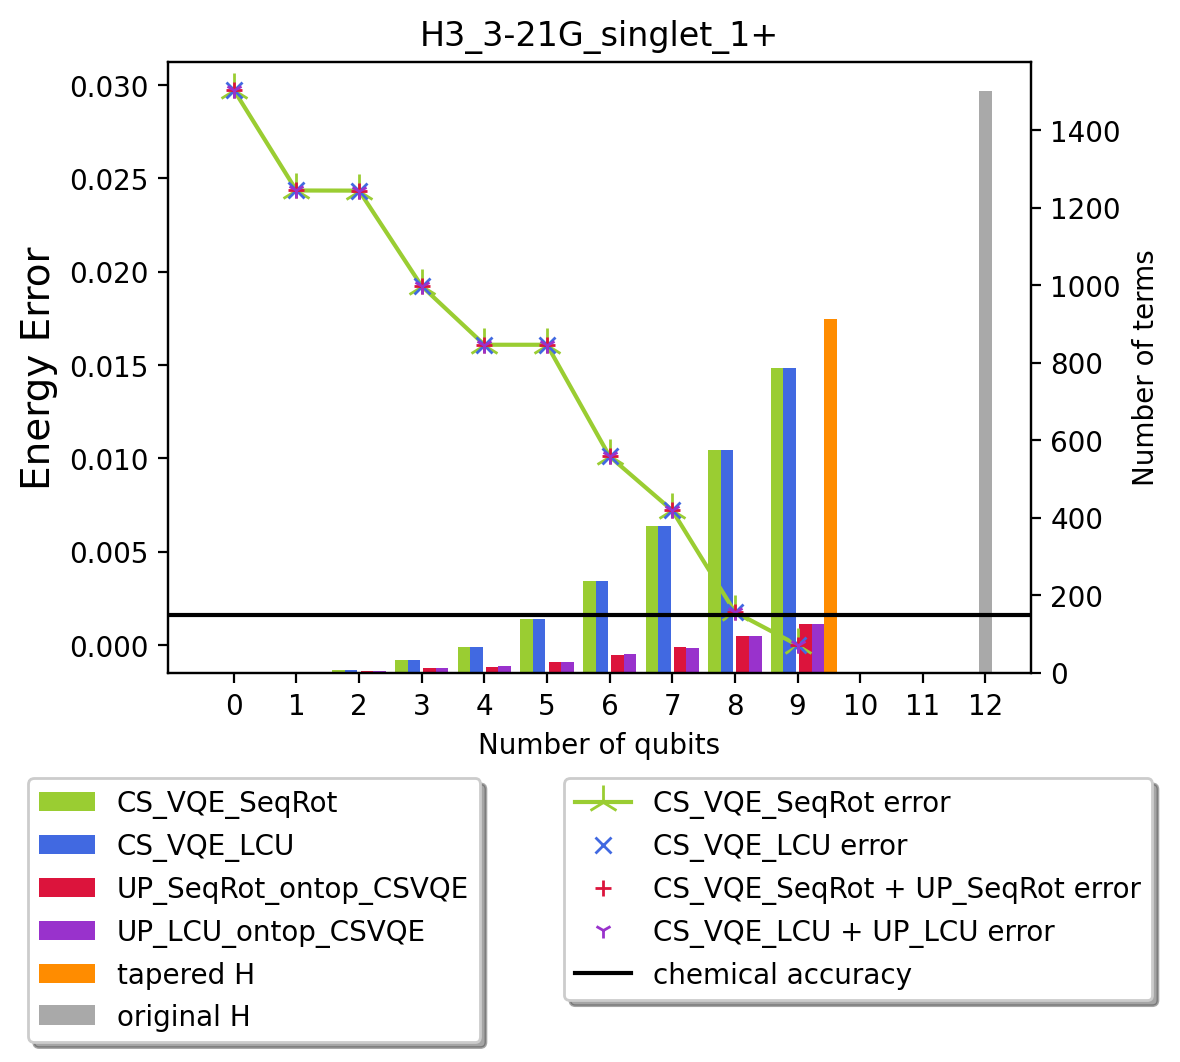

In [202]:
plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                        'H3_3-21G_singlet_1+',
                       dpi=200)

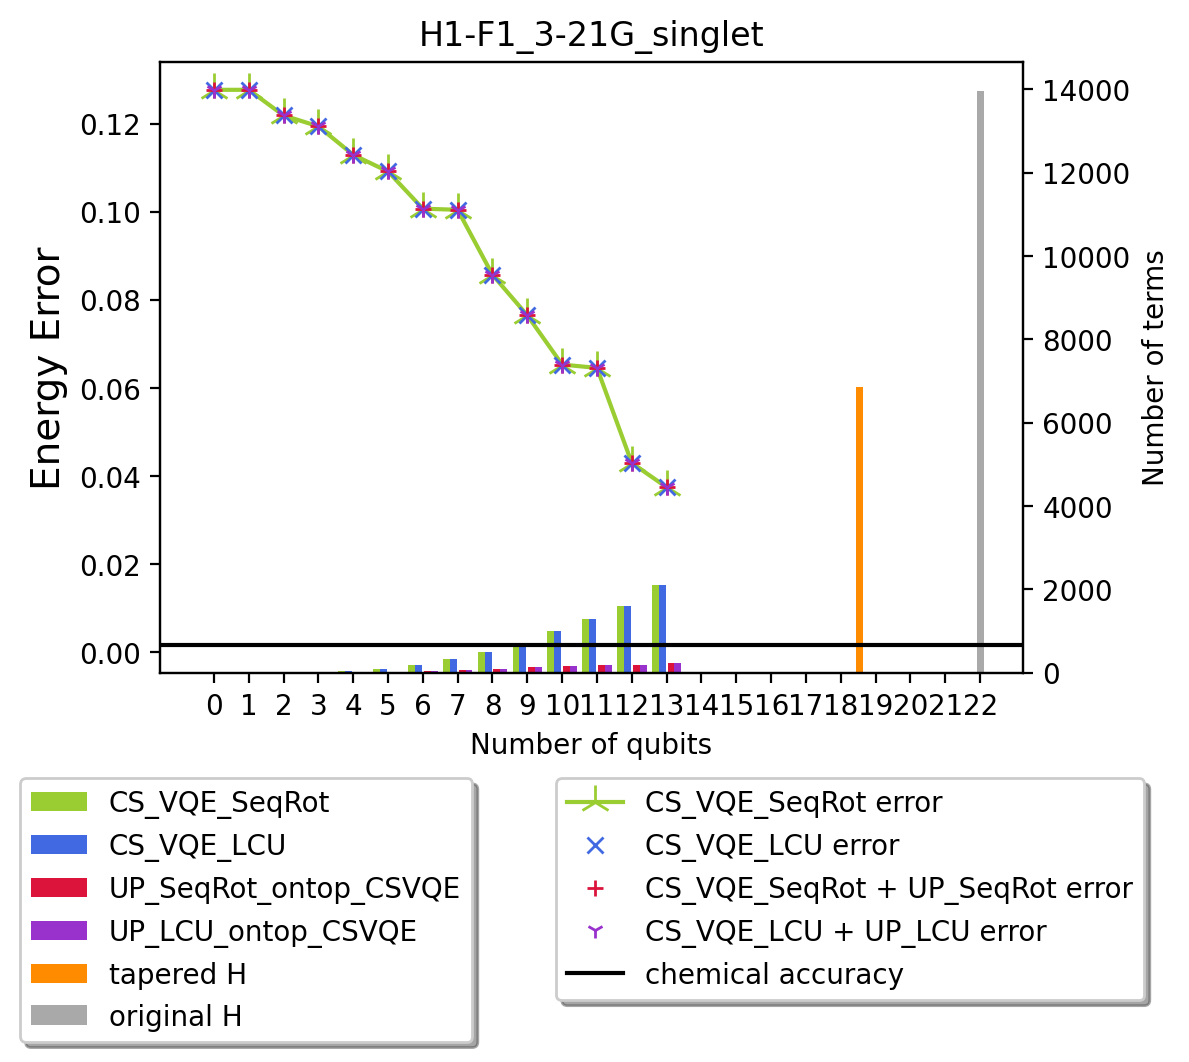

In [203]:
# calc still running on supercomputer! 
plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                        'H1-F1_3-21G_singlet',
                       dpi=200)

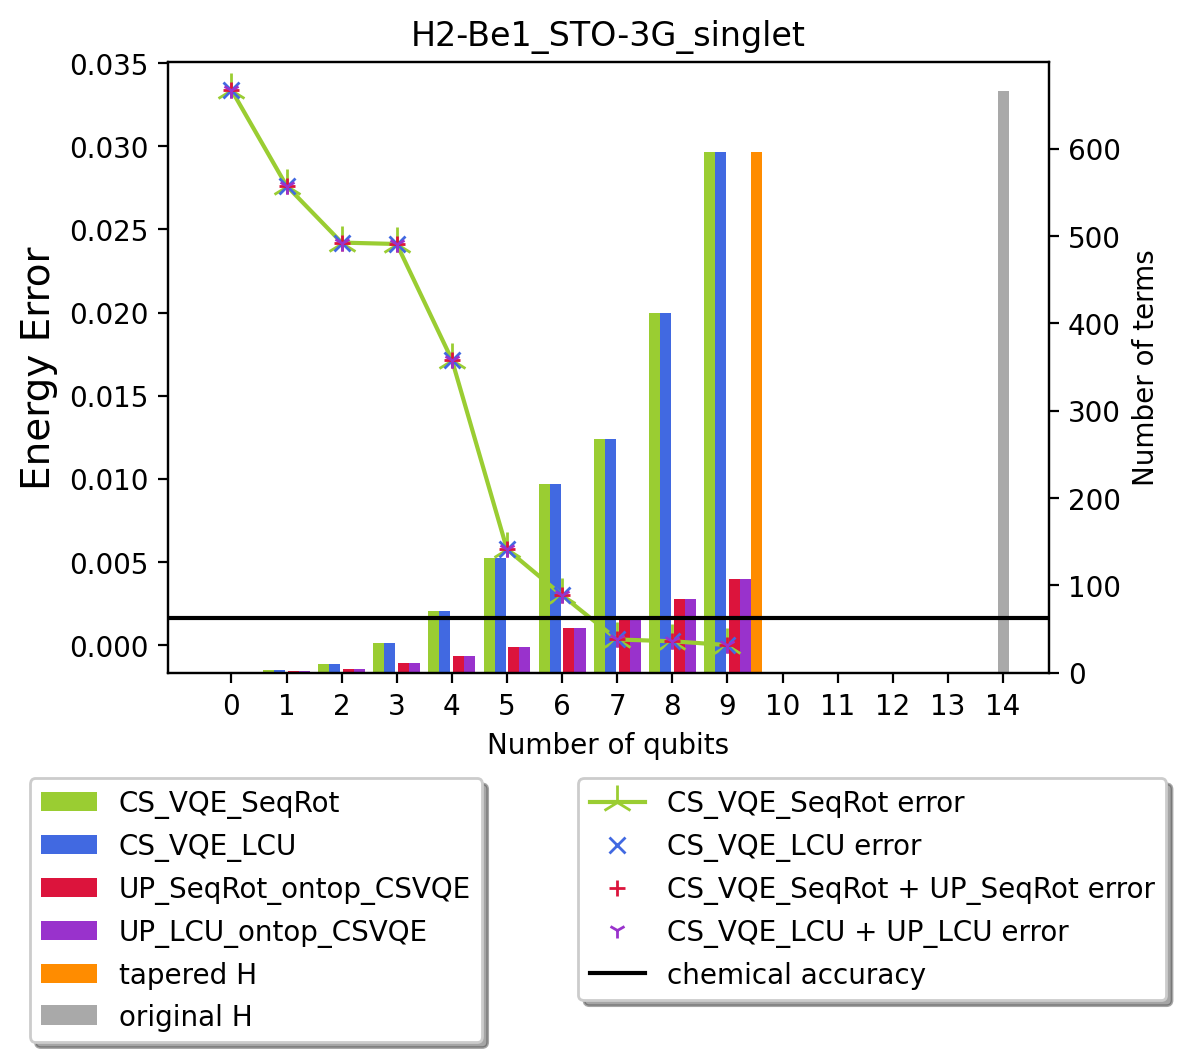

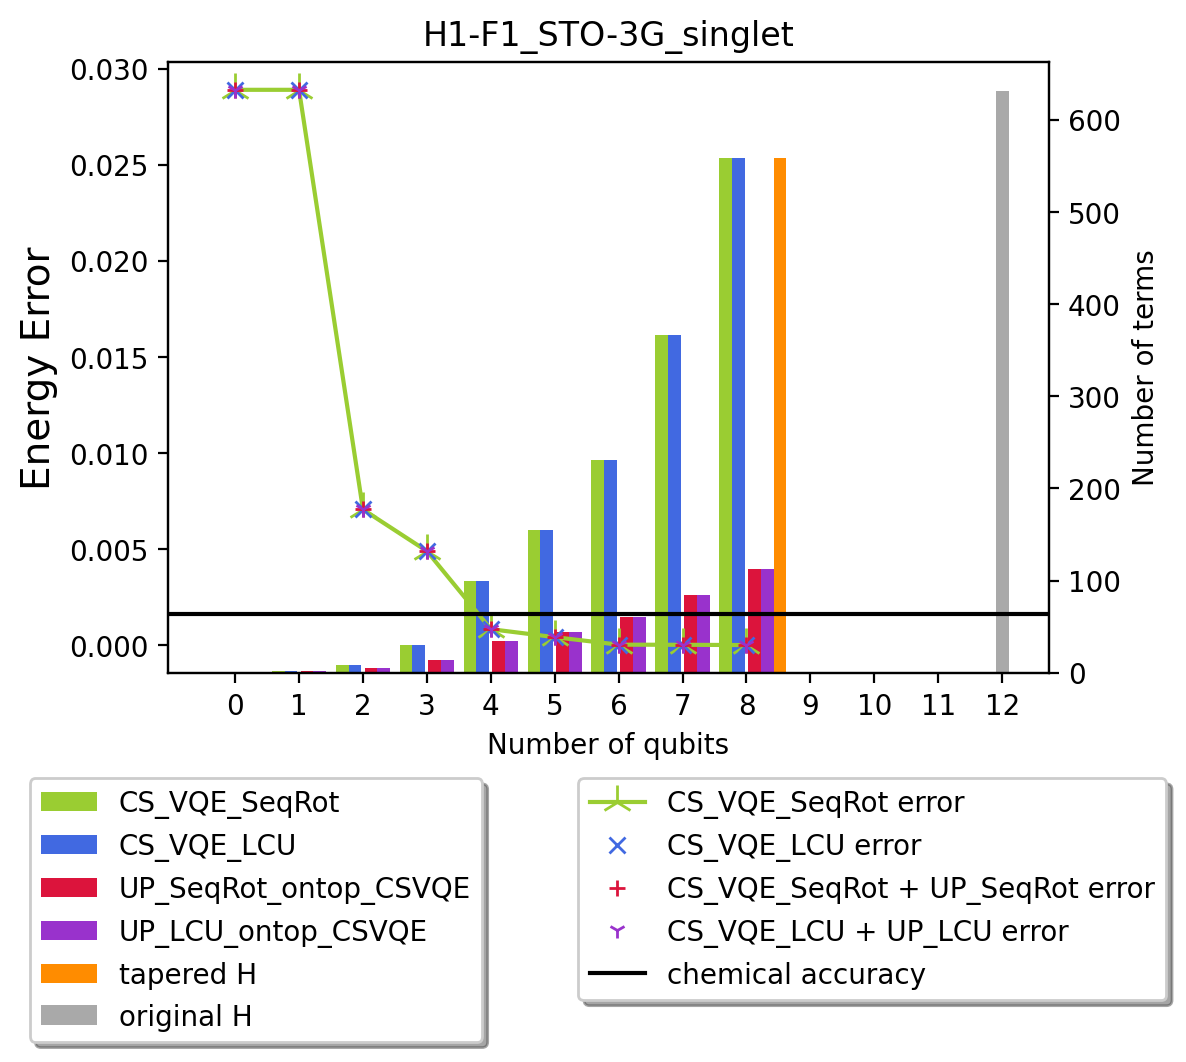

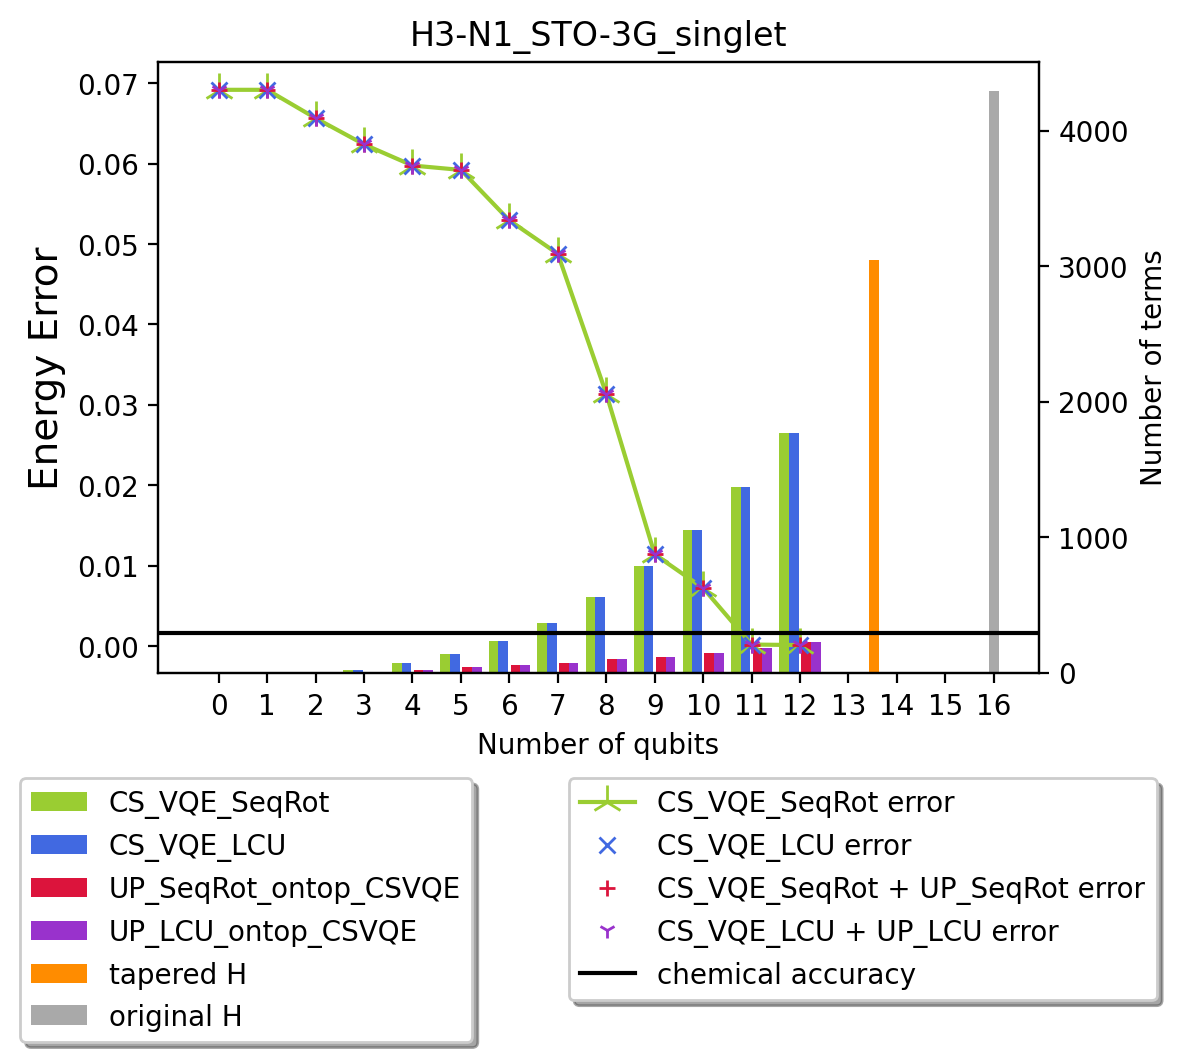

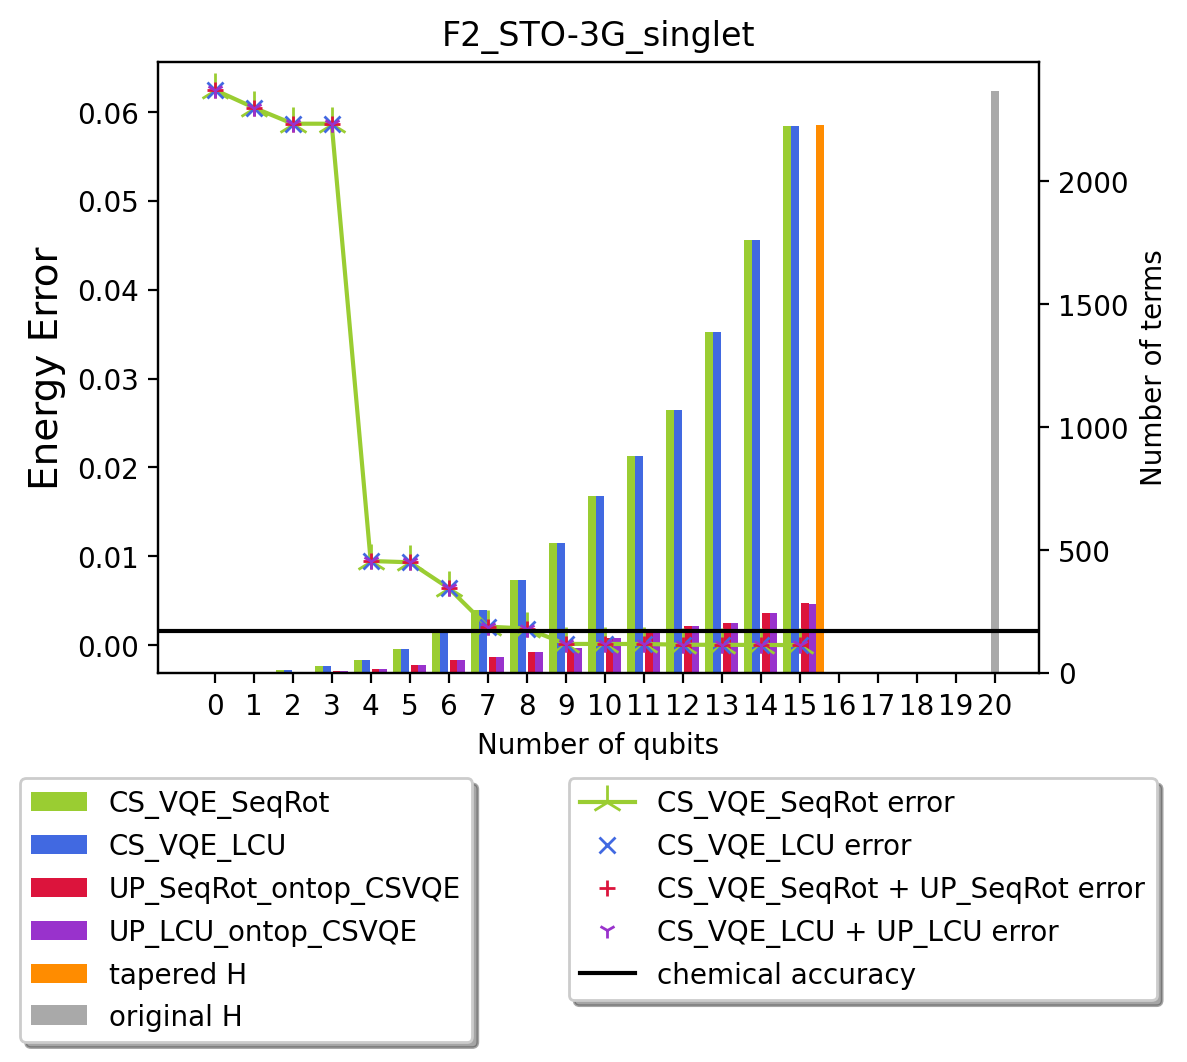

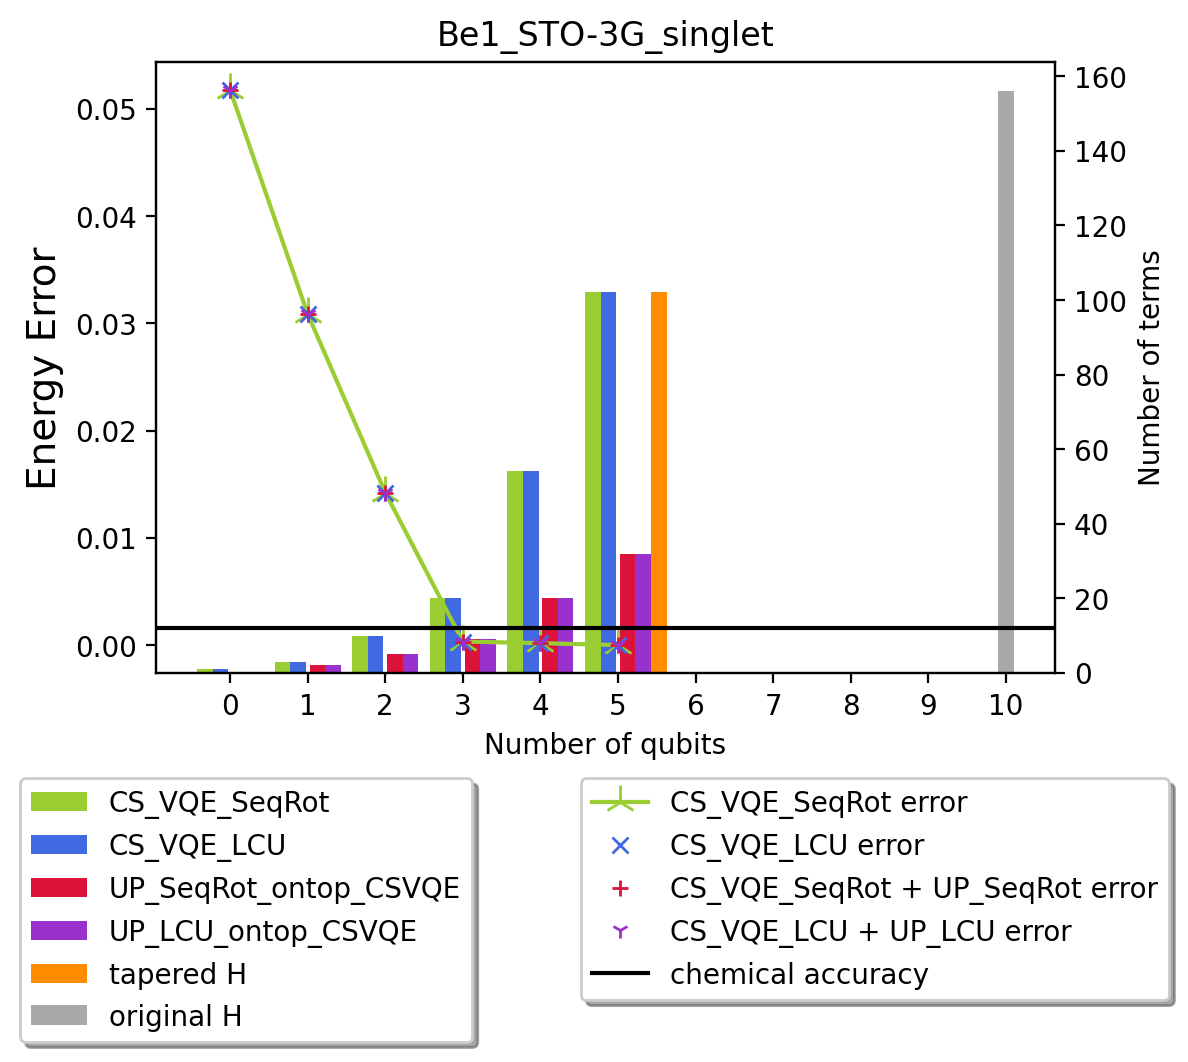

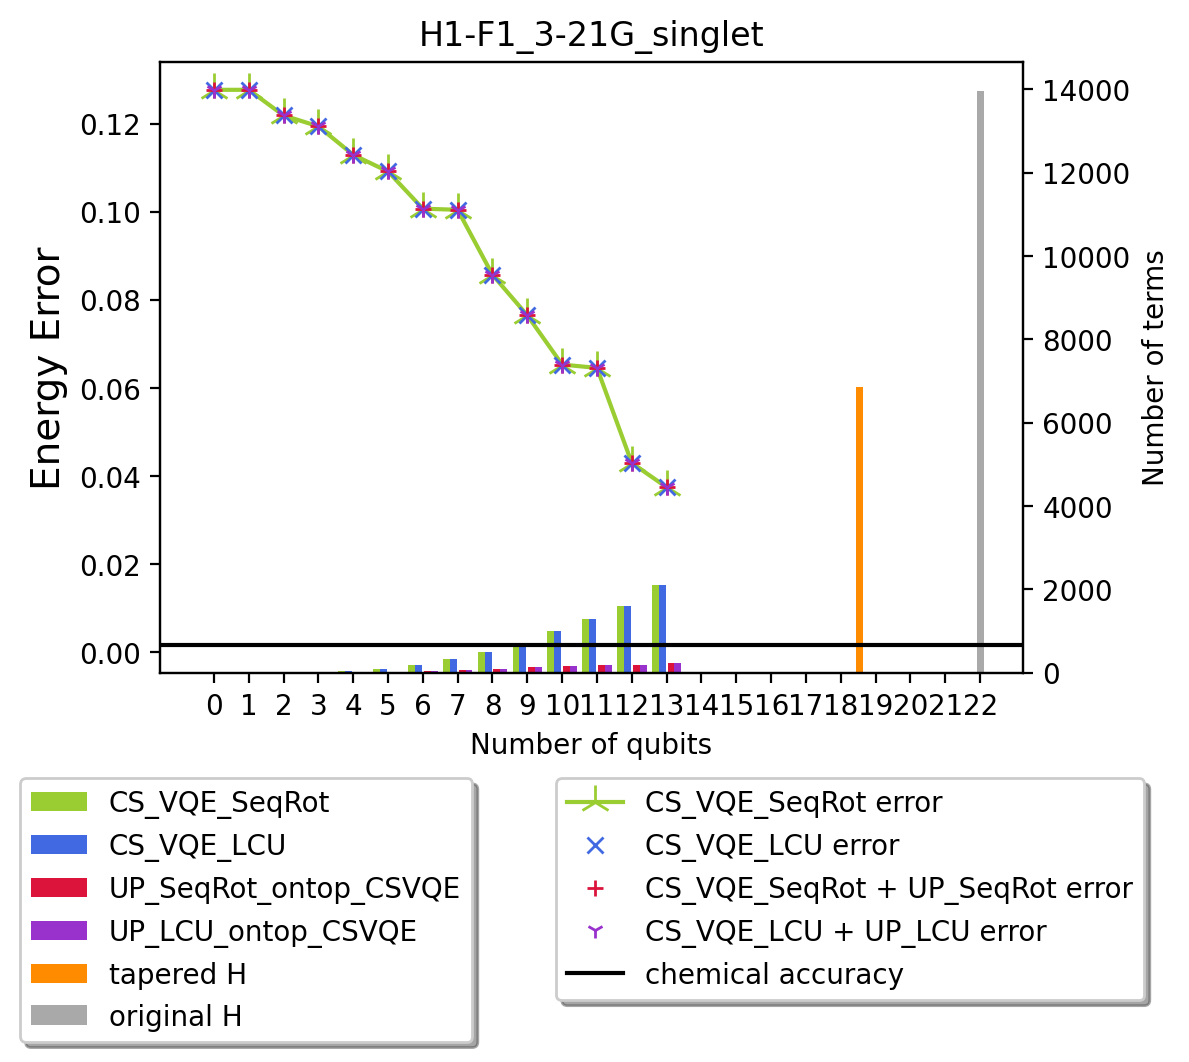

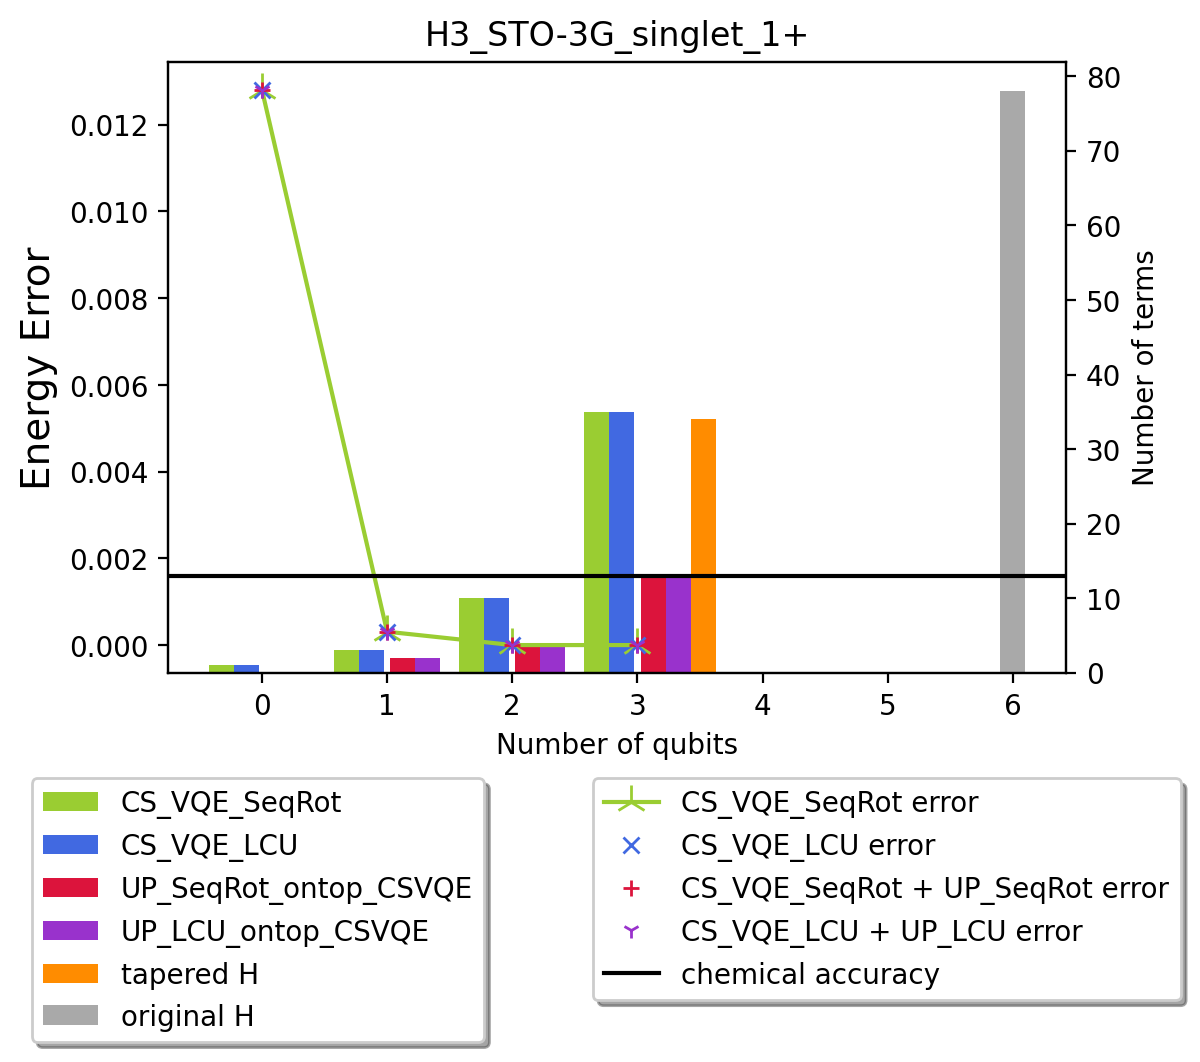

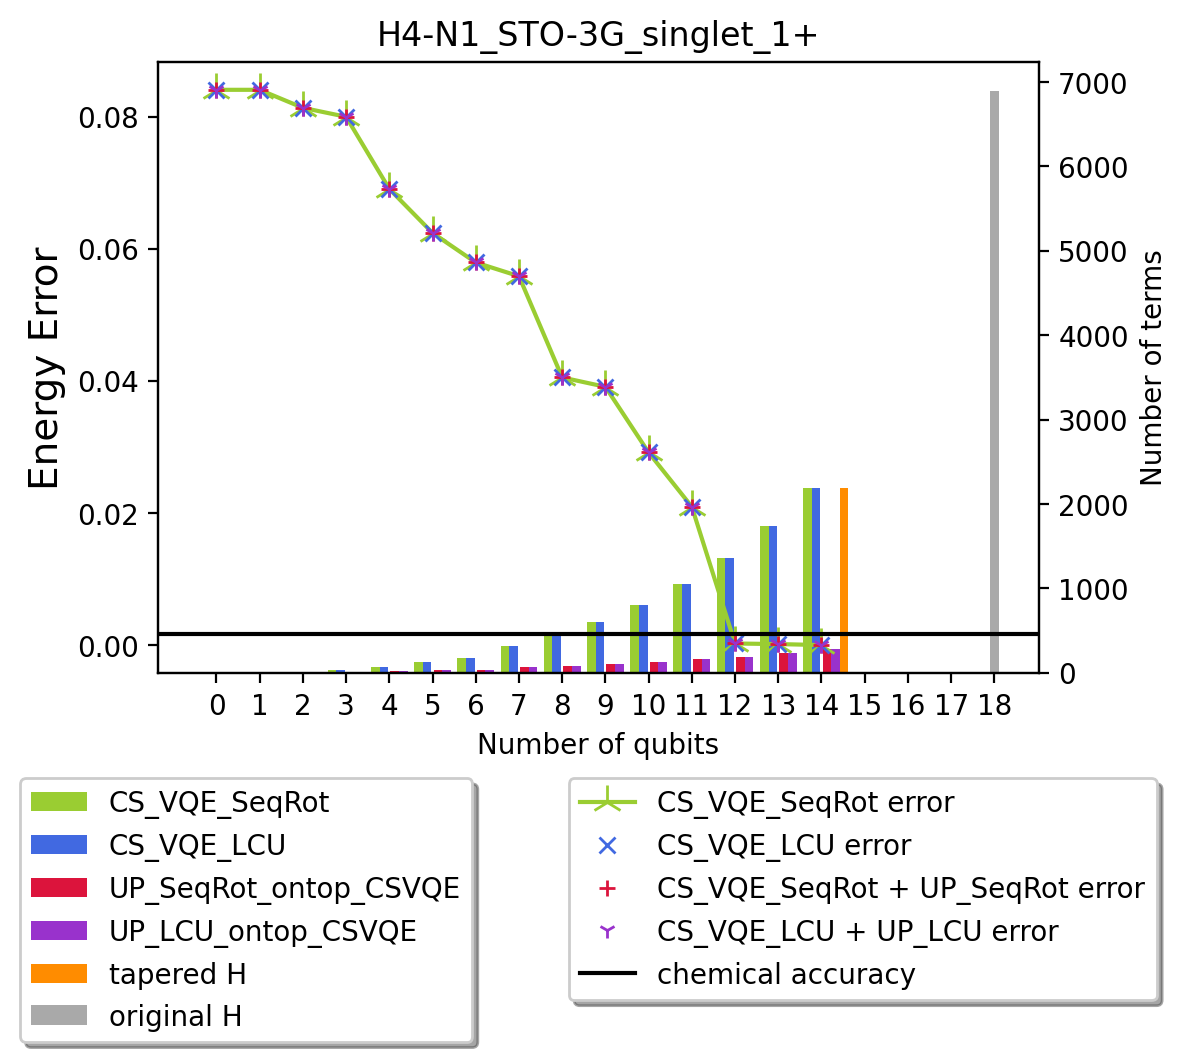

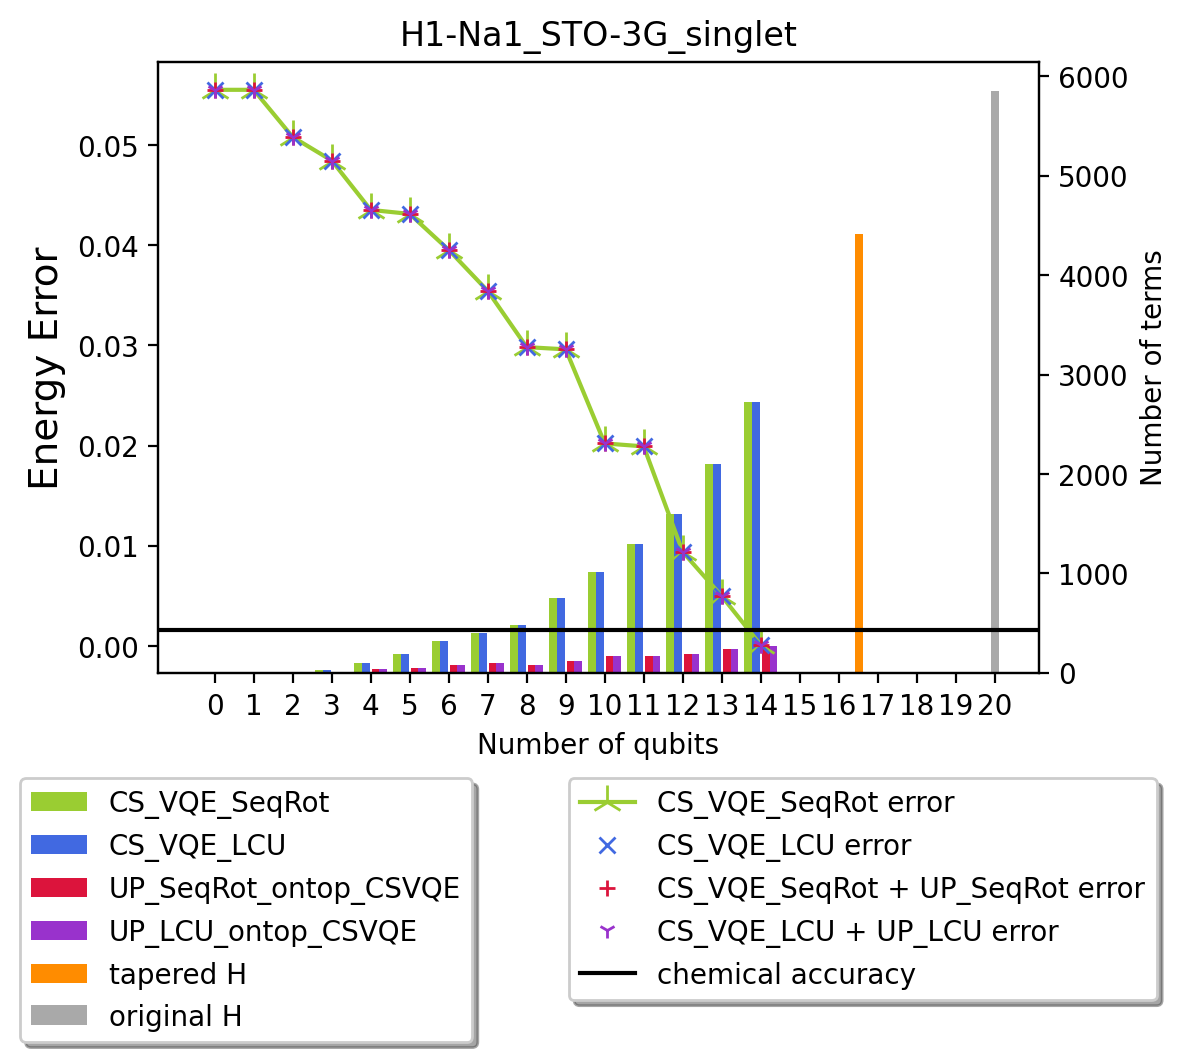

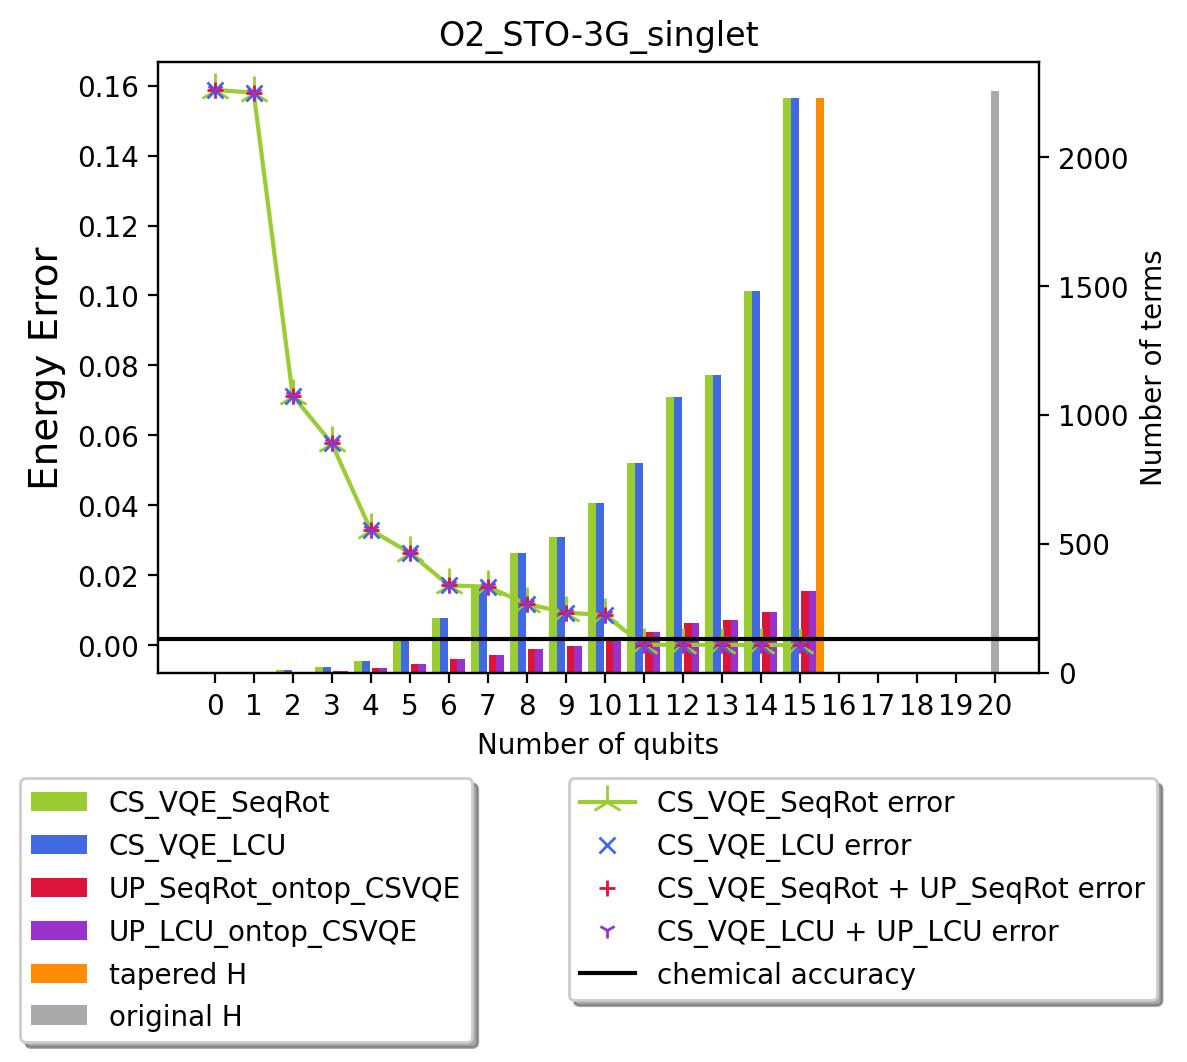

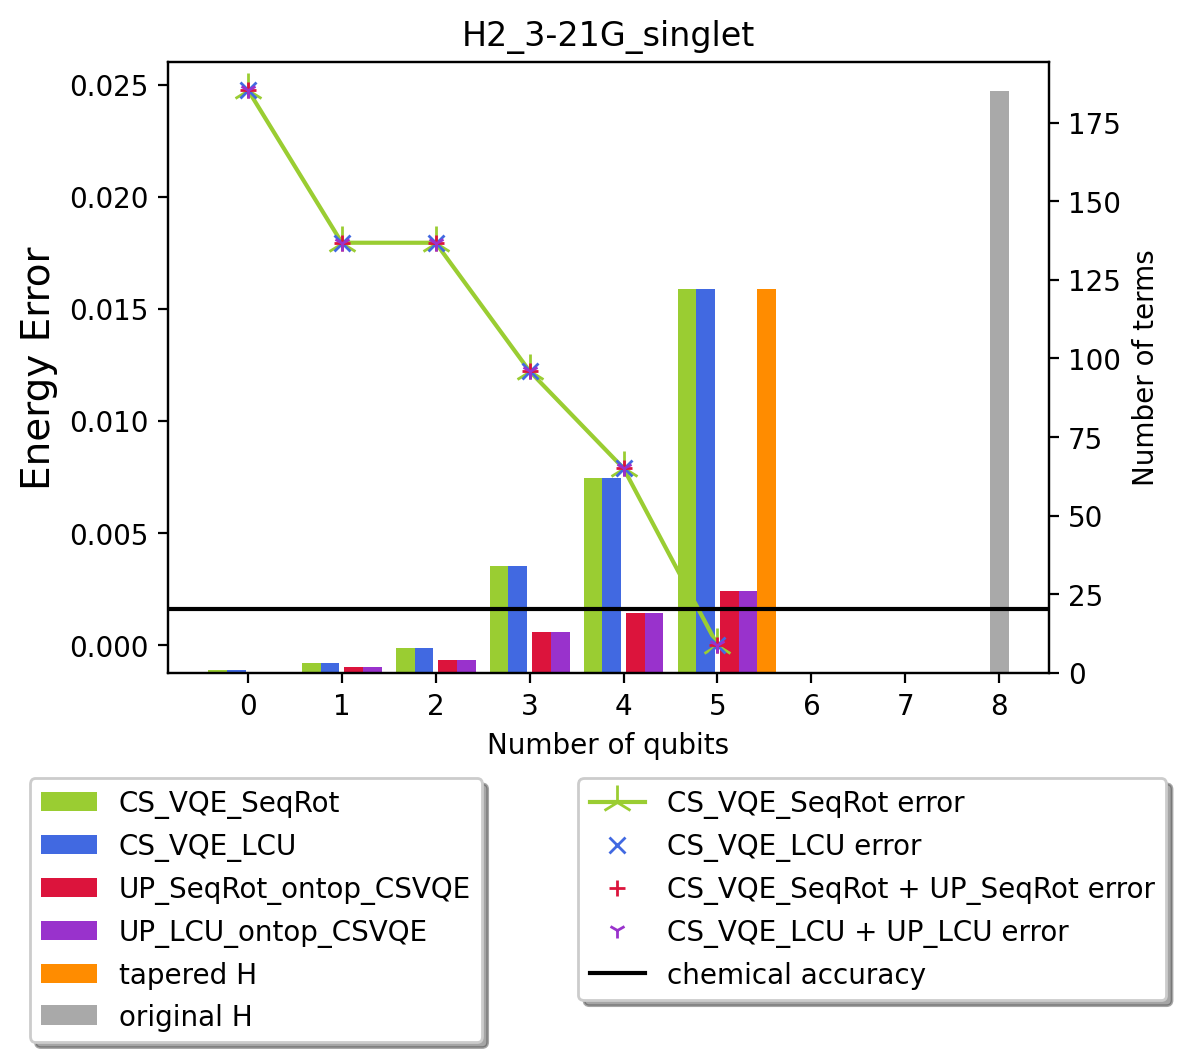

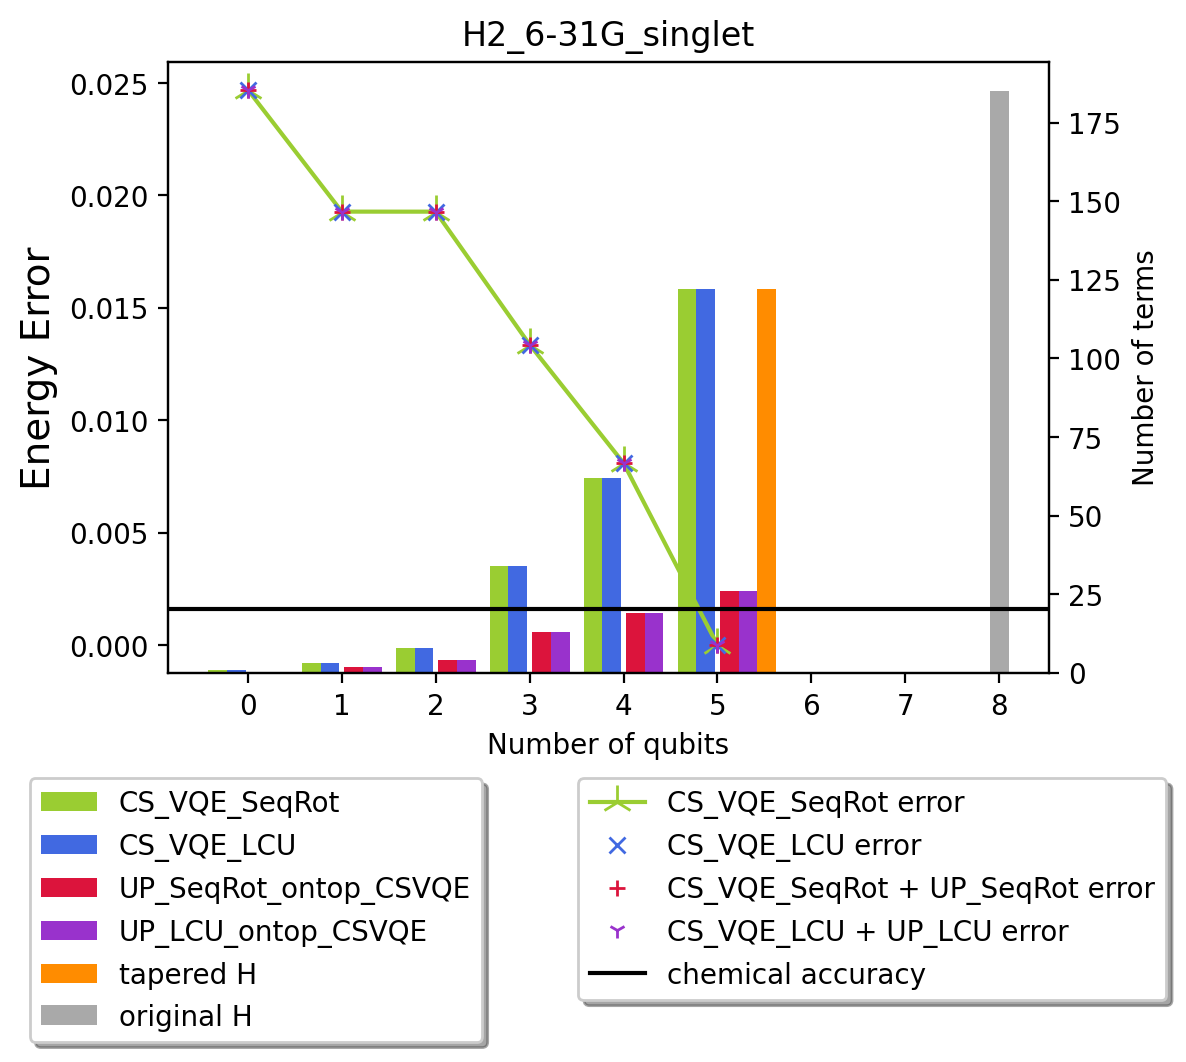

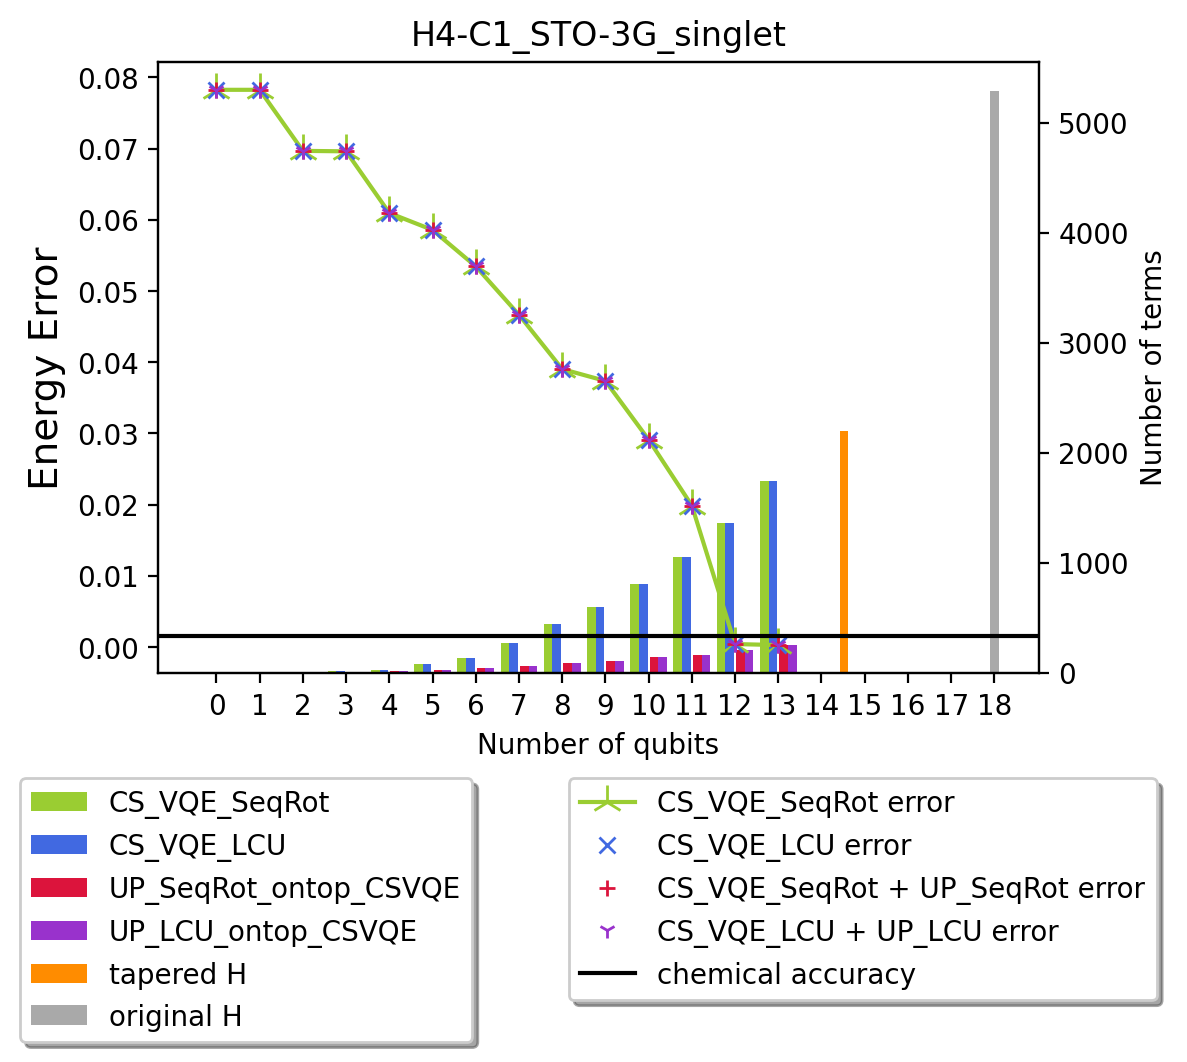

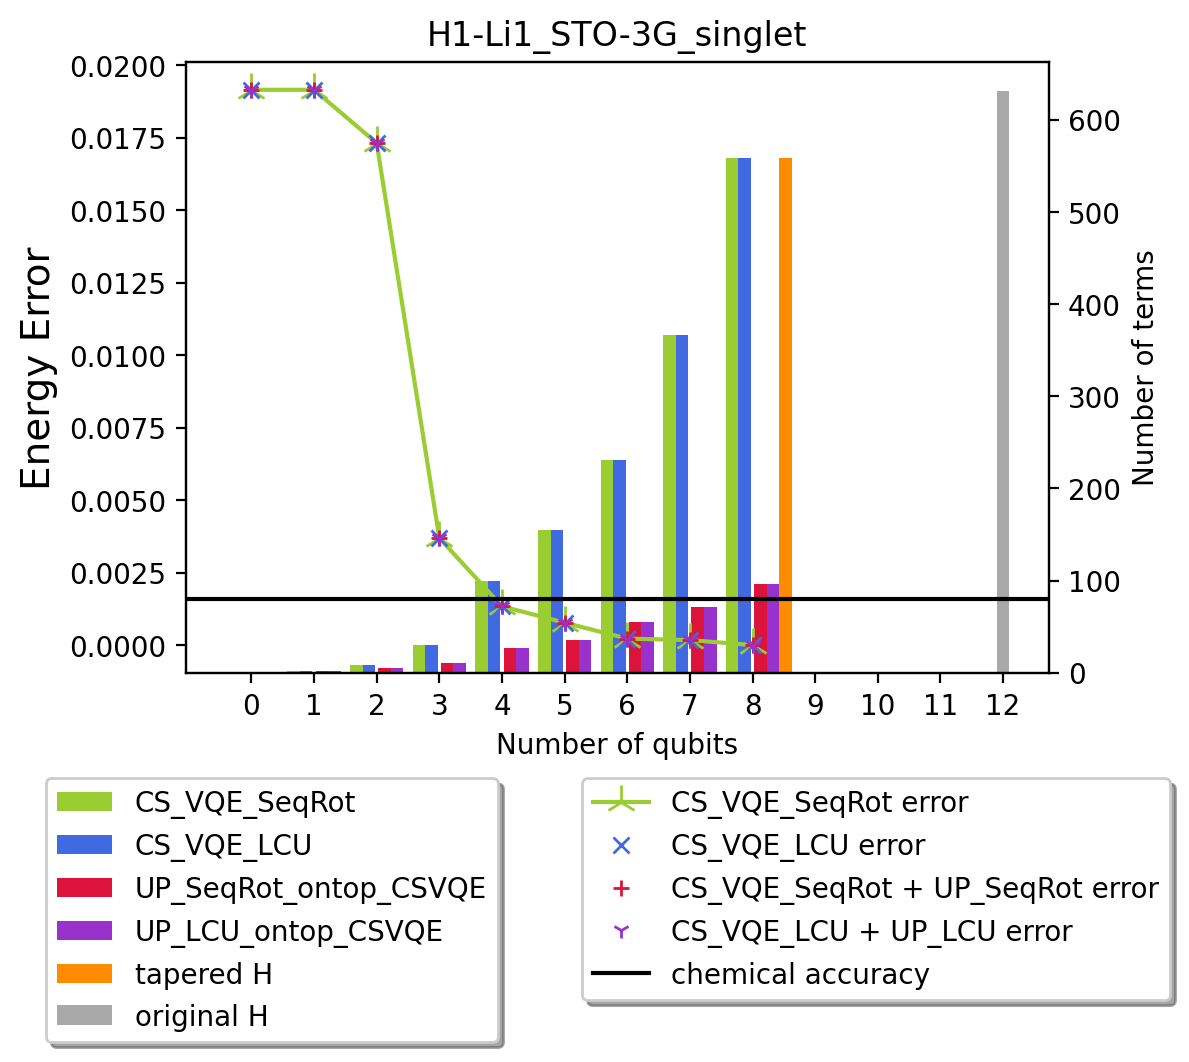

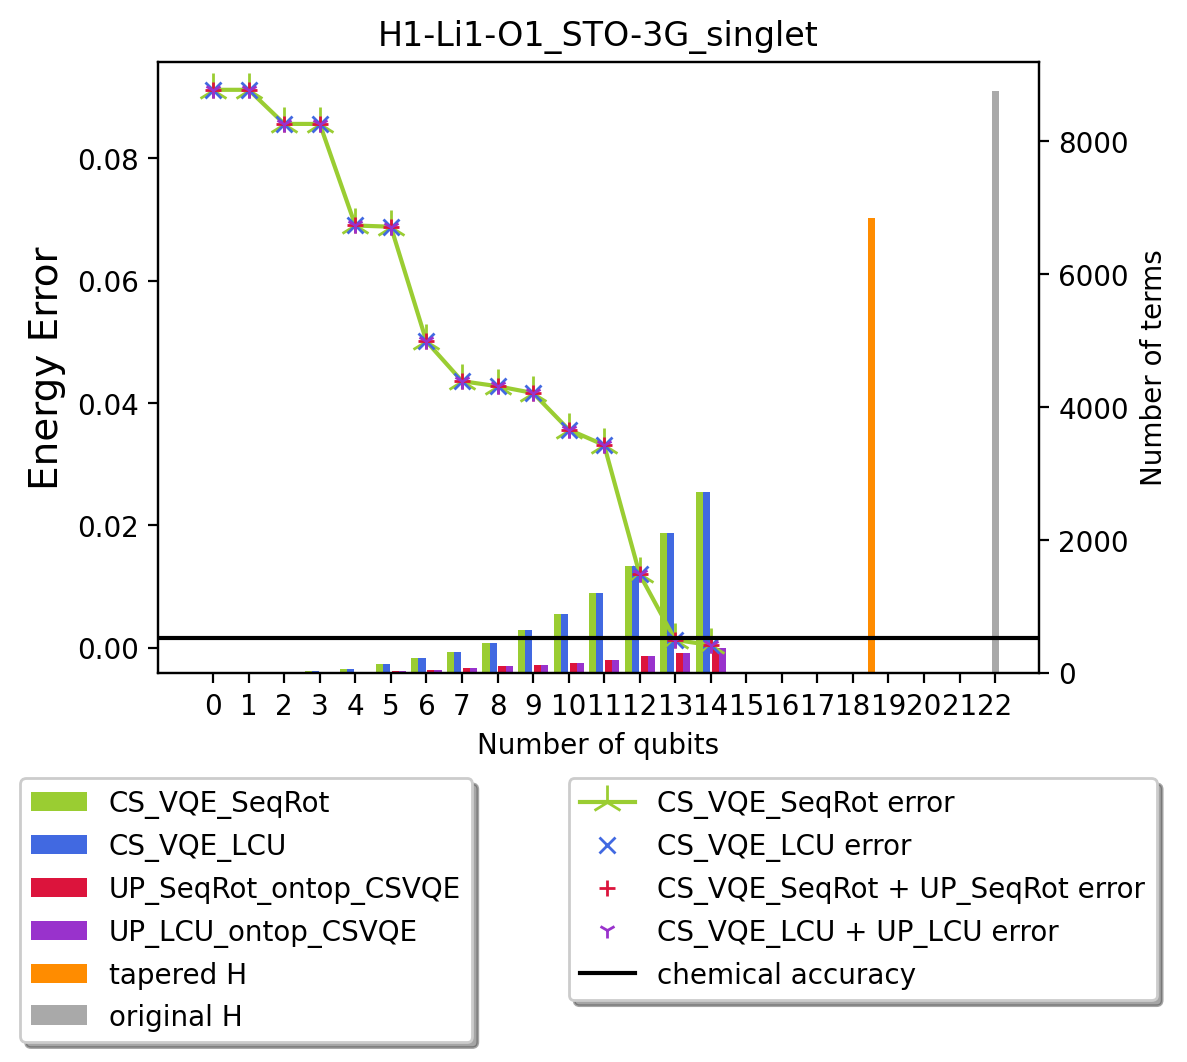

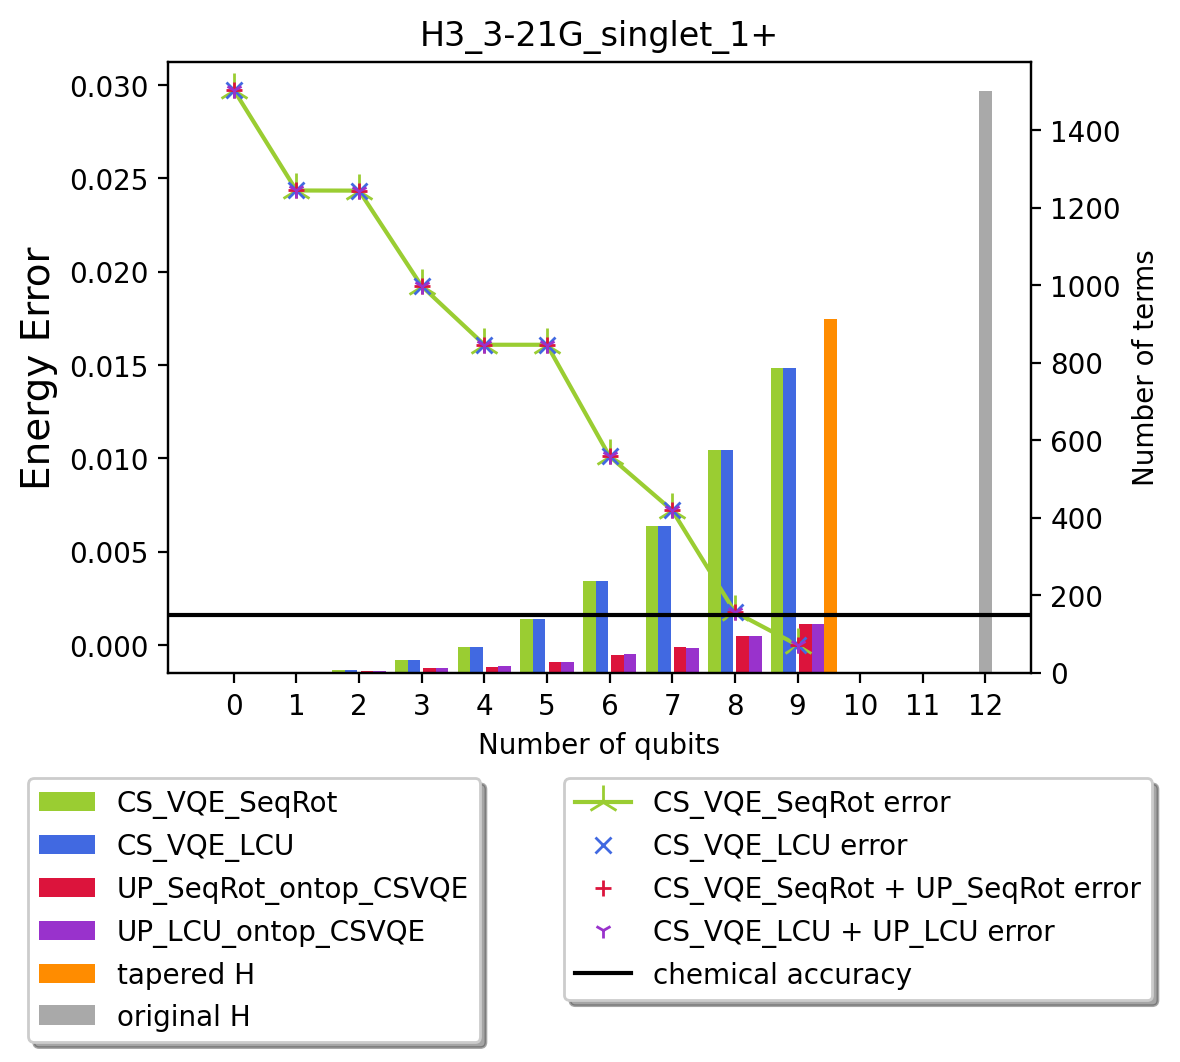

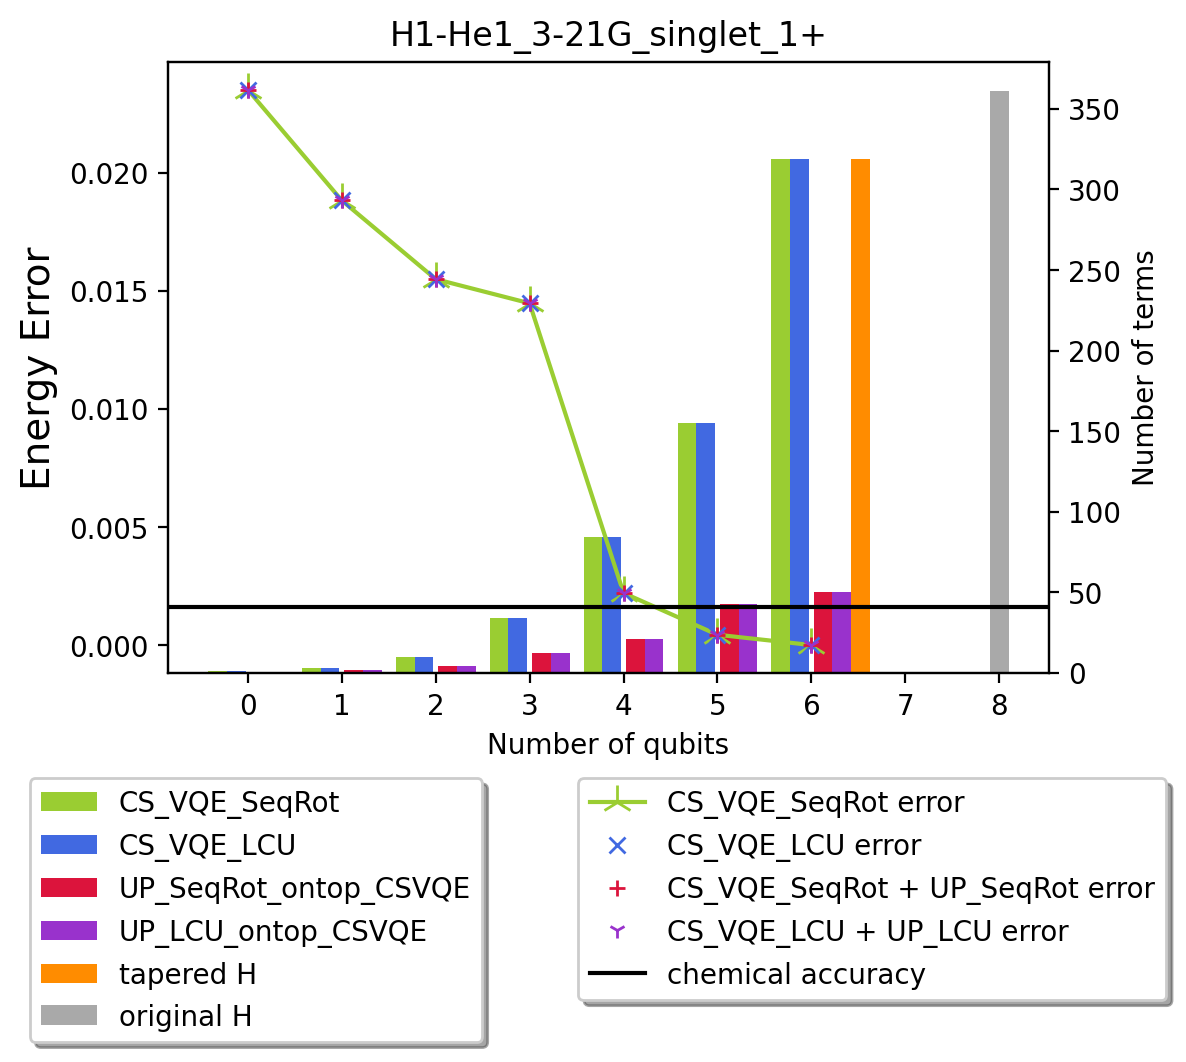

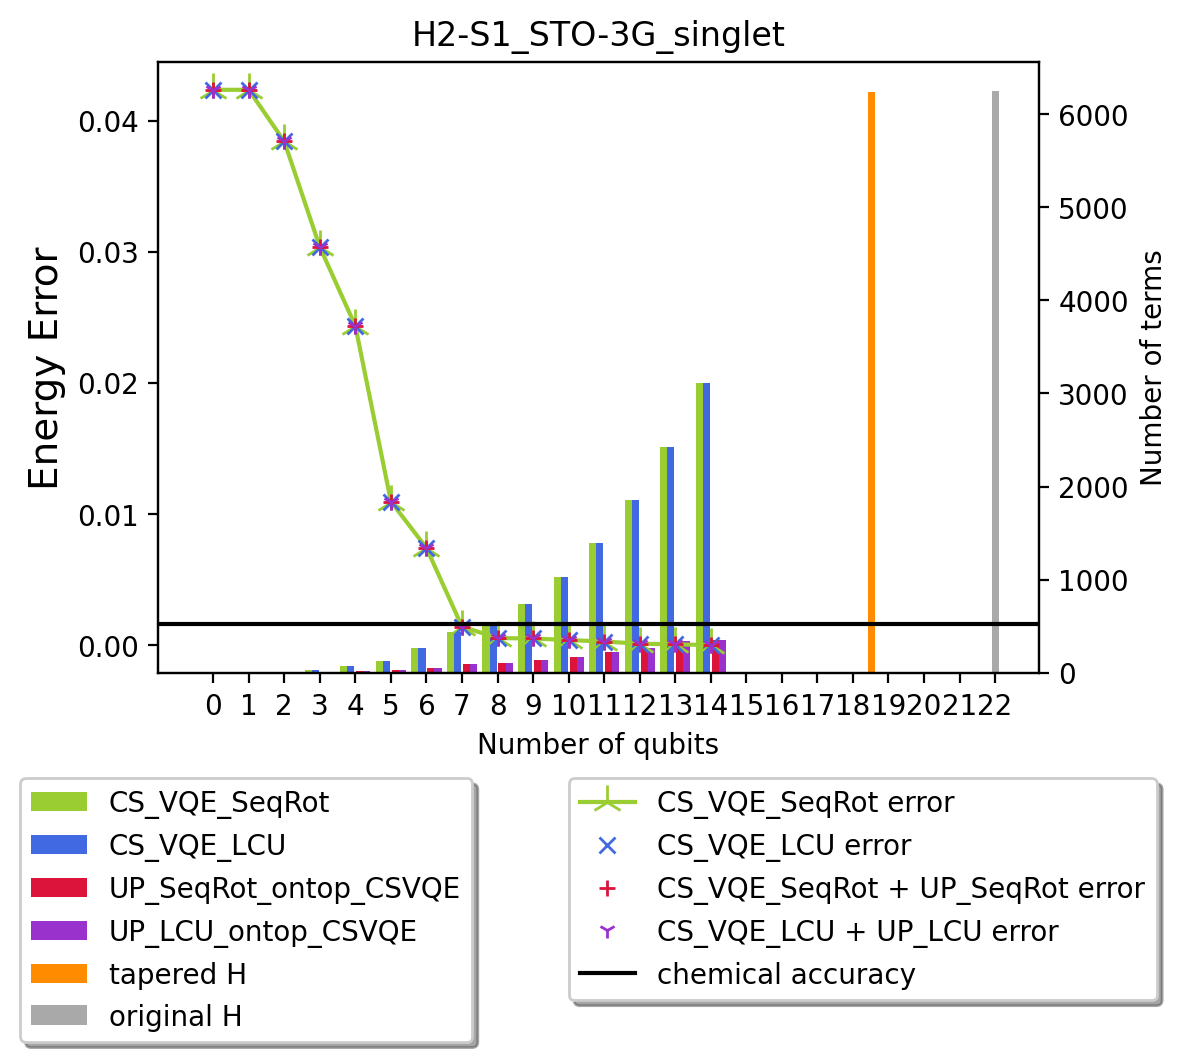

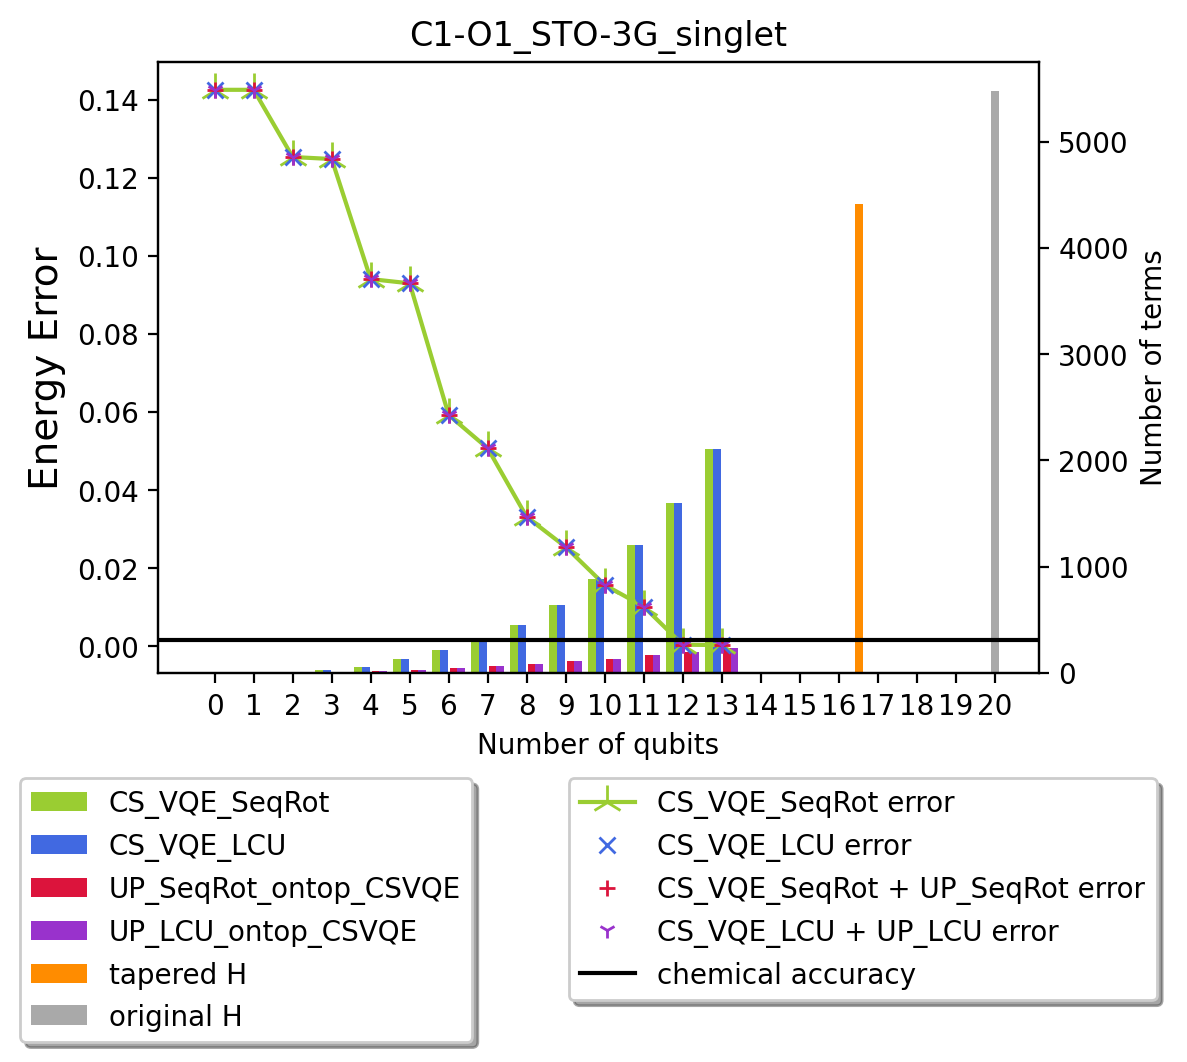

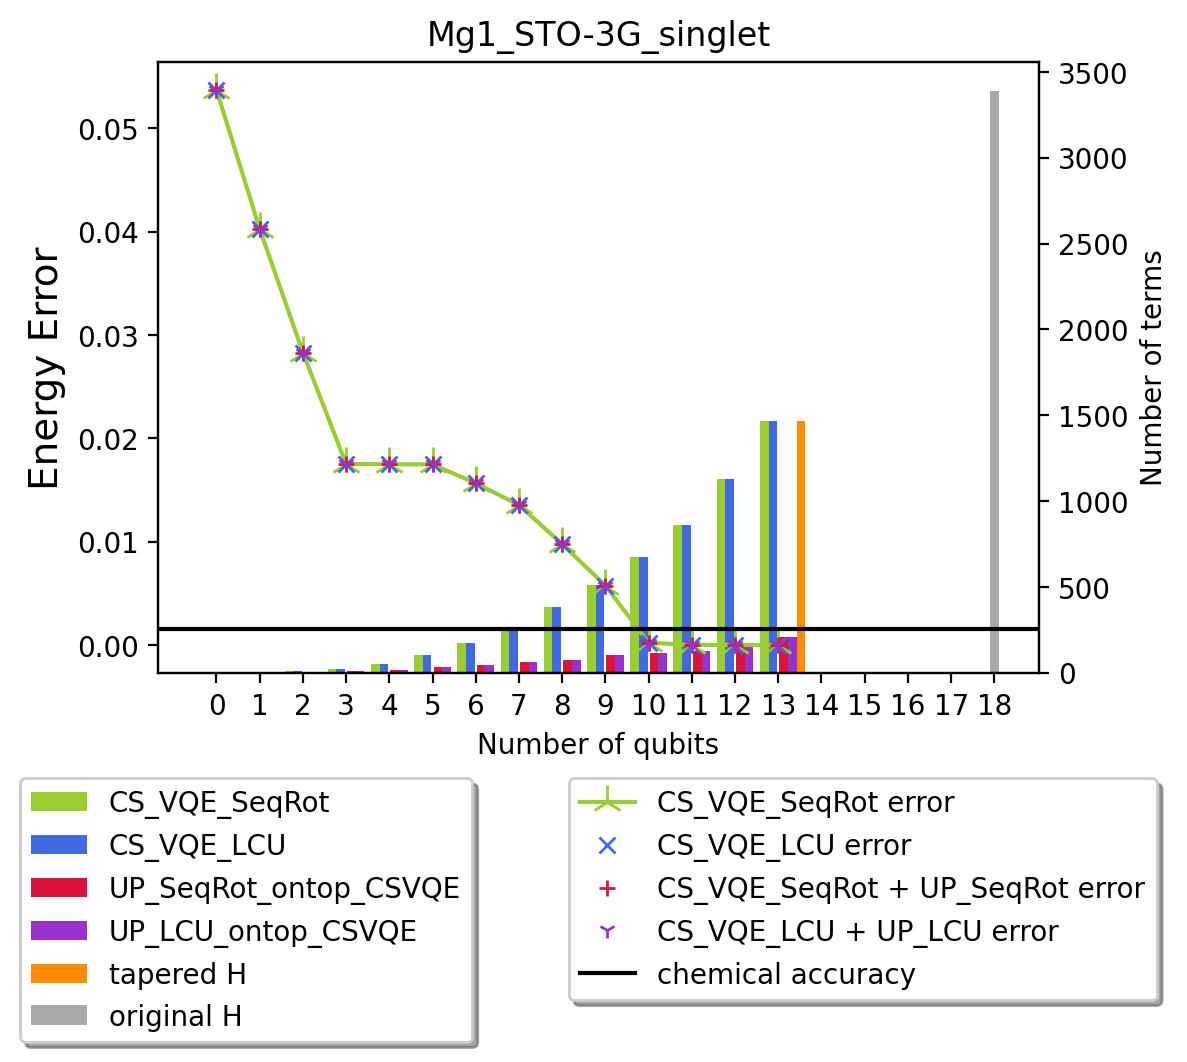

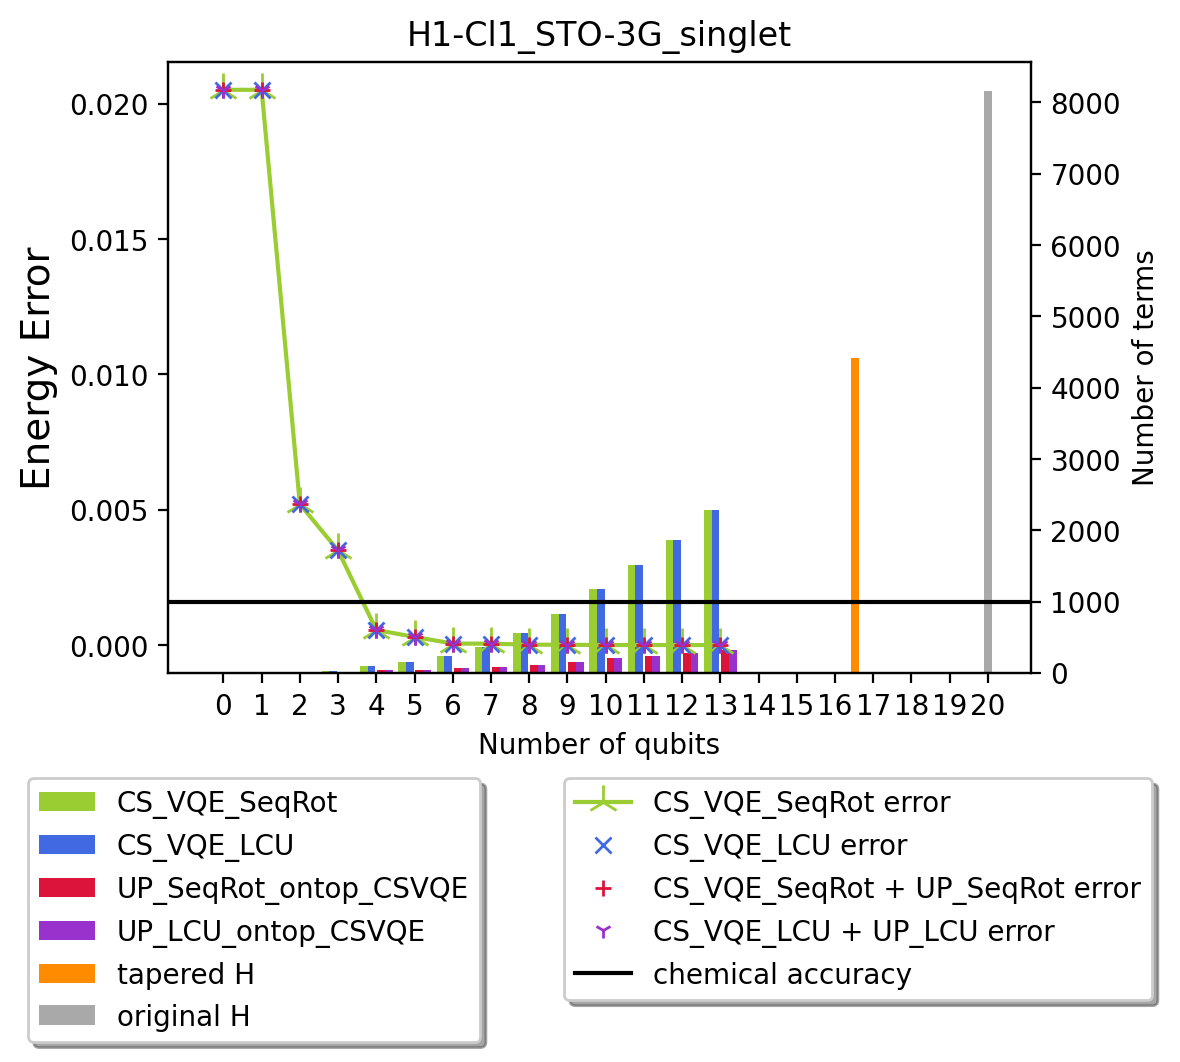

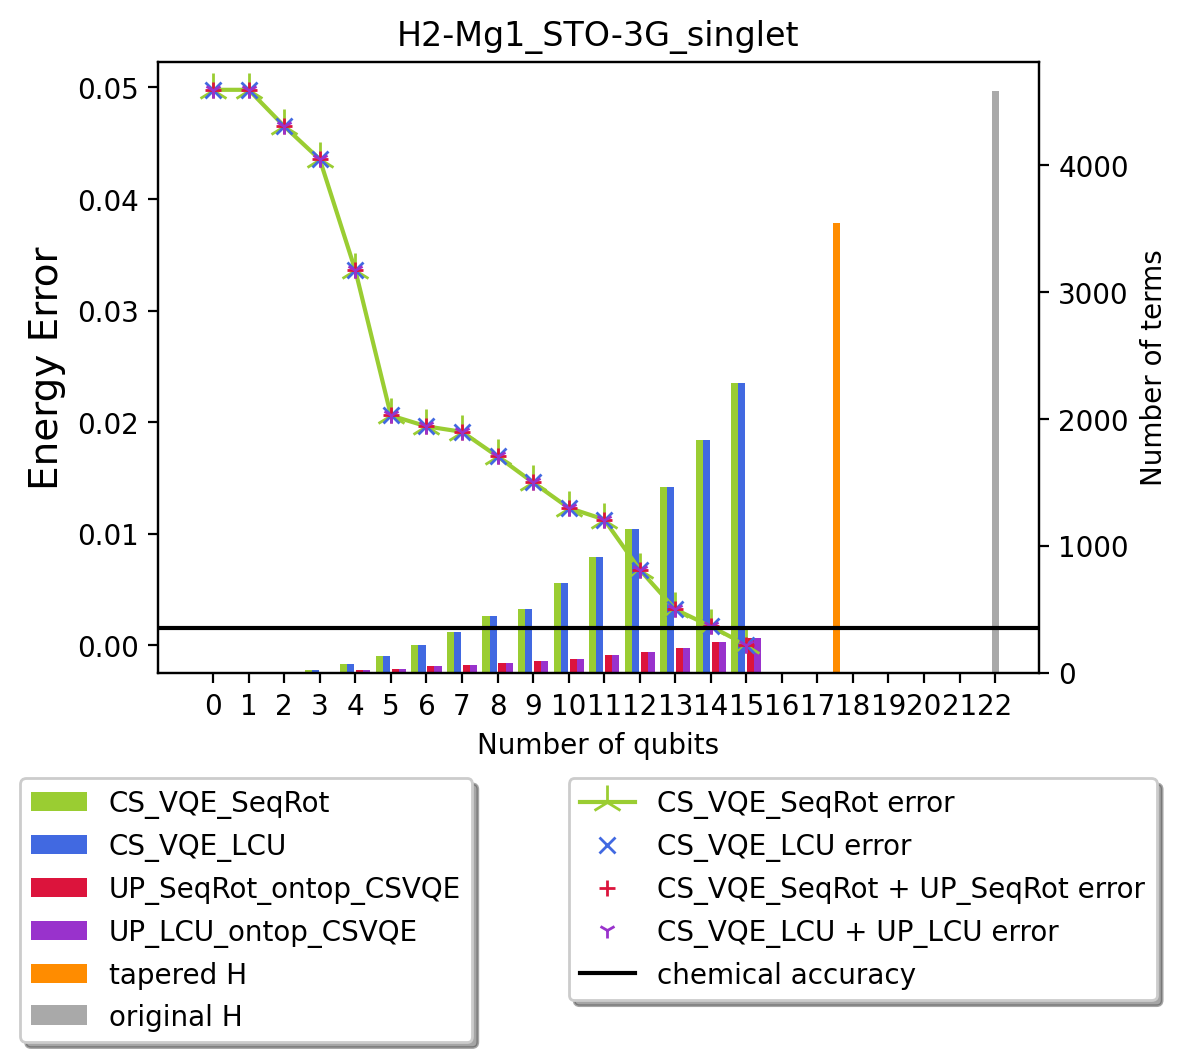

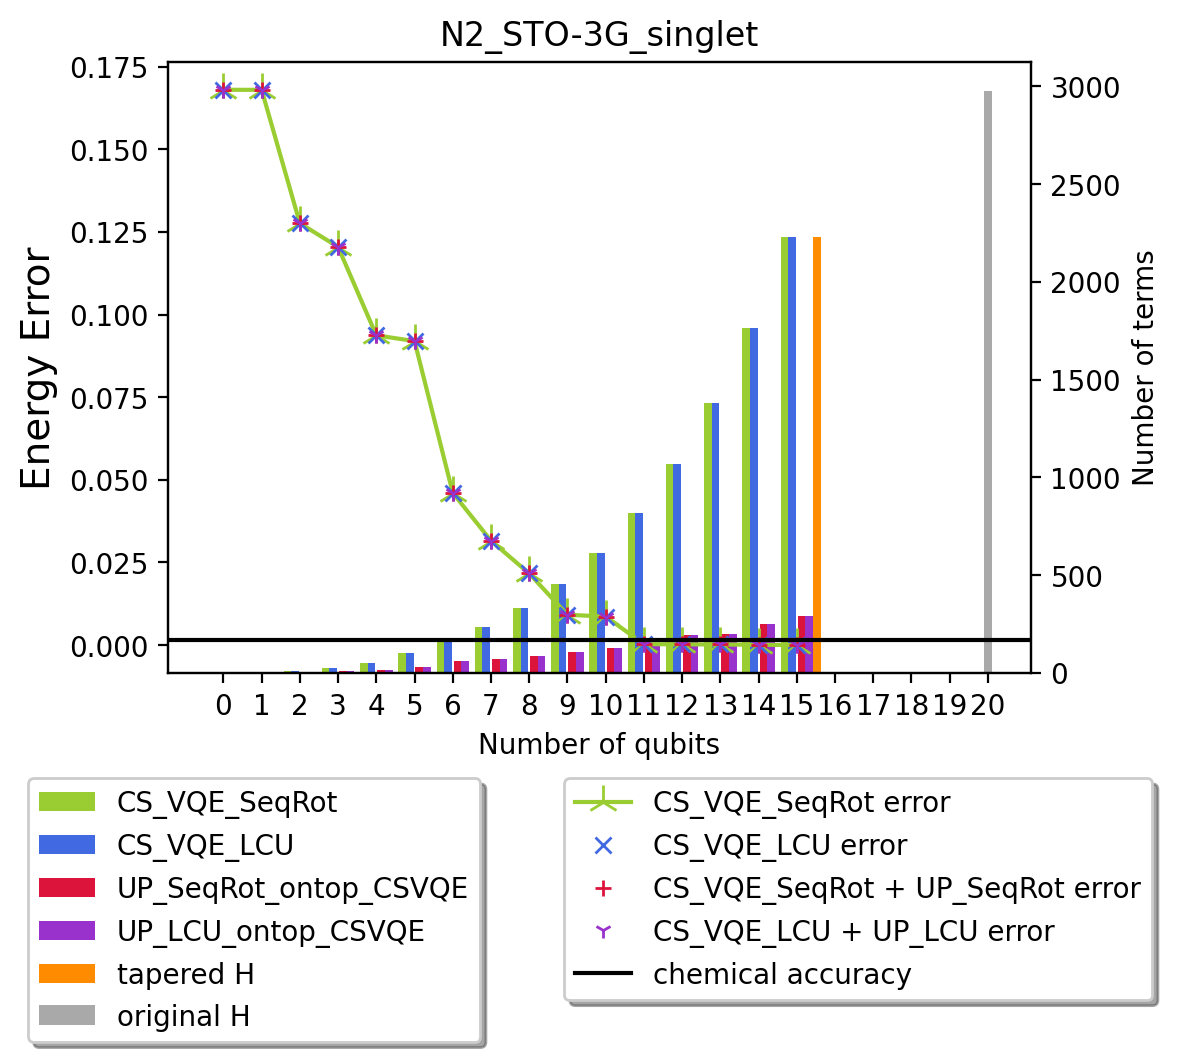

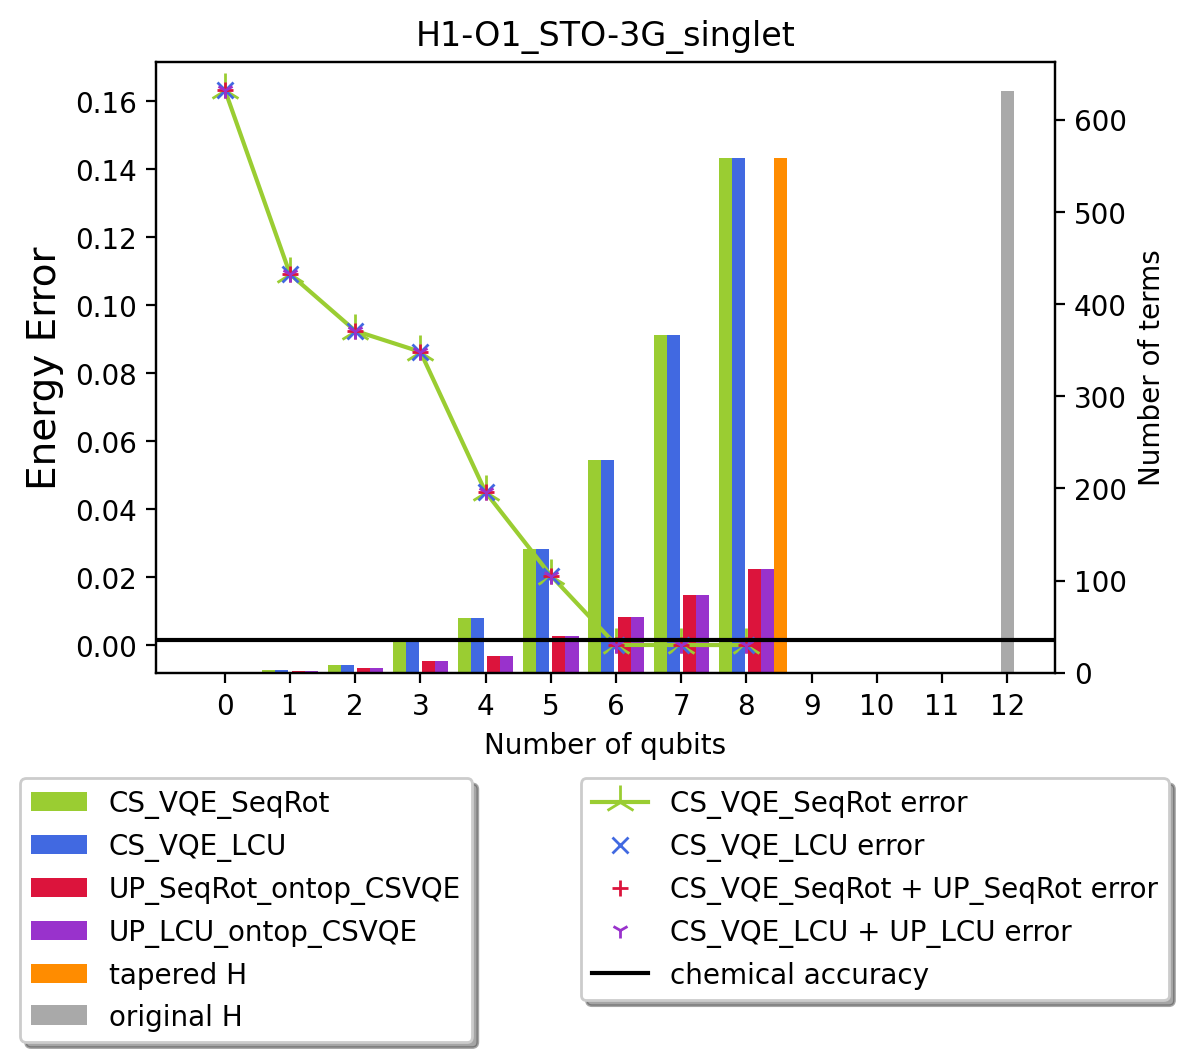

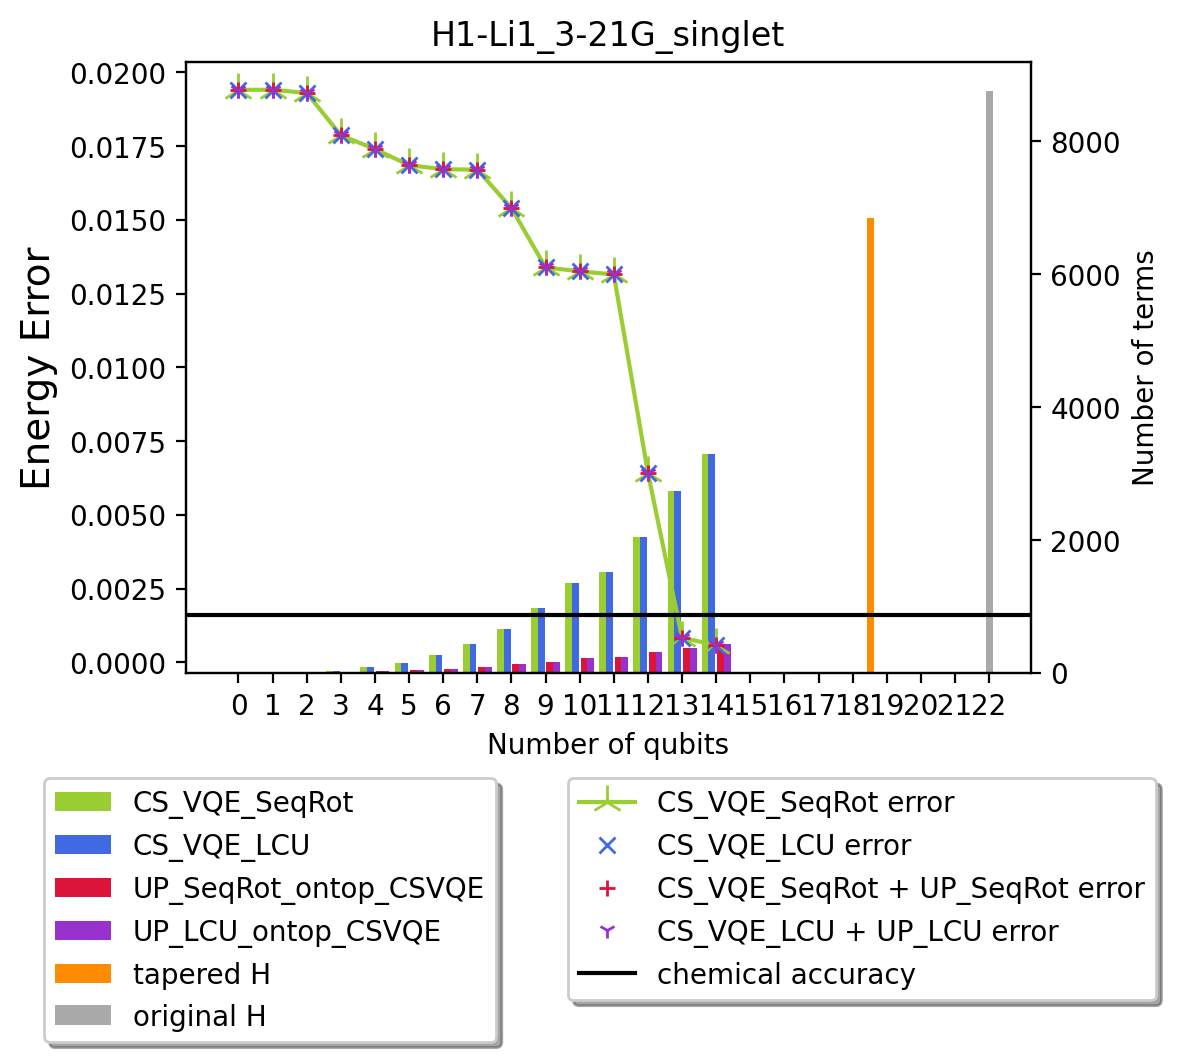

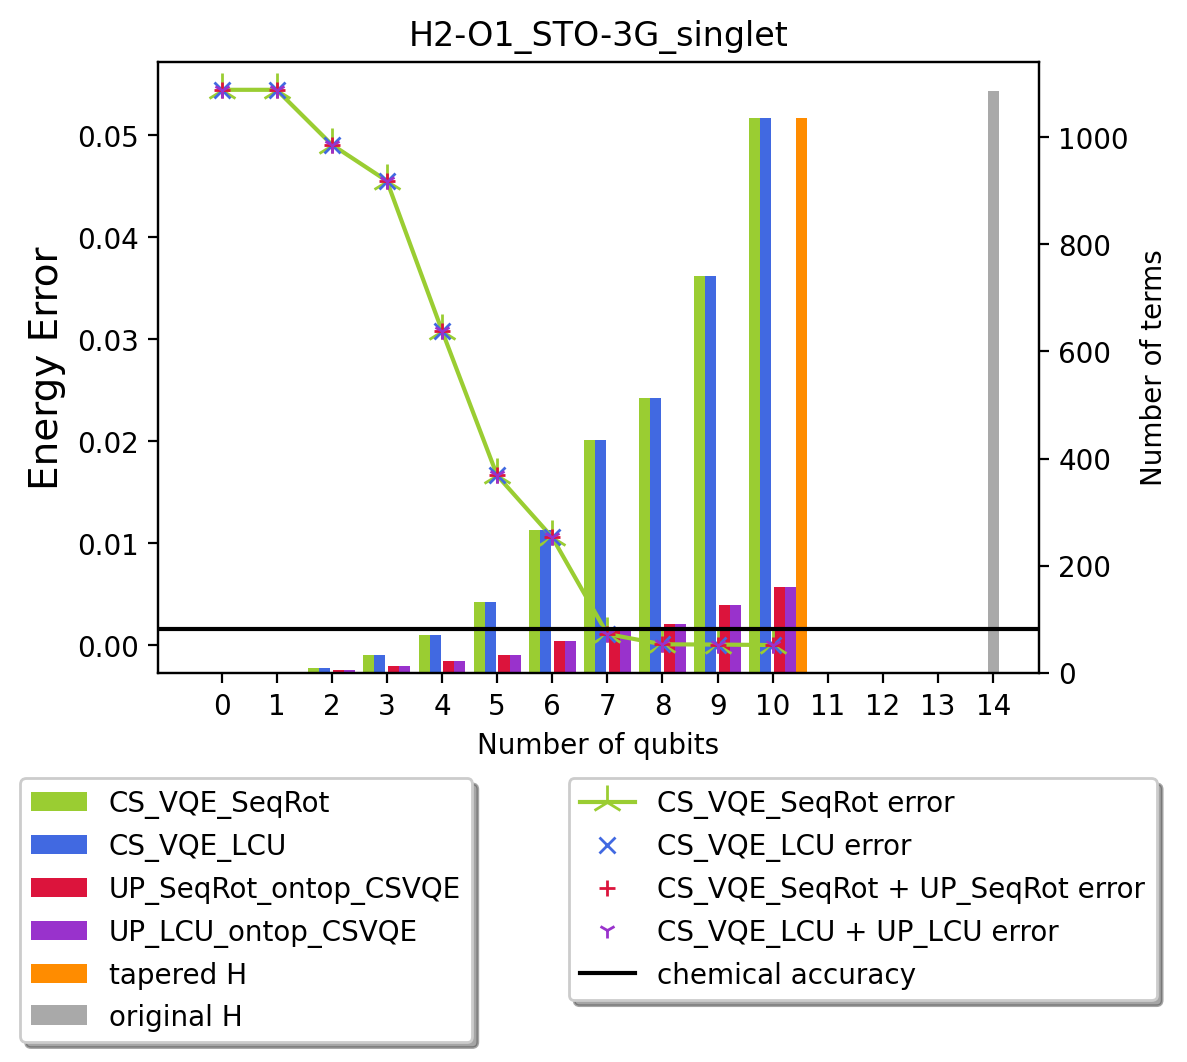

In [151]:
for molecule in myriad_UP_SeqRot_on_CSVQE_SeqRot.keys():
    plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                       molecule,
                       dpi=200)

In [29]:
1.6e-3

0.0016

In [153]:
import pandas as pd
from copy import deepcopy

In [157]:
data = {'molecule': [], 
        'No. qubits': [], 
        'No. terms CS-VQE LCU':[],
        'No. terms CS-VQE SeqRot':[],
        'No. terms CS-VQE LCU and LCU UP':[],
        'No. terms CS-VQE SeqRot and SeqRot UP':[],
        'Original No. qubits tapered H':[],
        'Original No. terms tapered H':[]
       }

for mol_name in myriad_UP_SeqRot_on_CSVQE_SeqRot.keys():
    
    True_gs_energy = myriad_CS_VQE_LCU_results[mol_name]['exp_conditions']['true_gs']
    
    # SeqRot UP ontop CSVQE
    for ind in sorted(myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name].keys()): 
        UP_SeqRot_E = myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name][ind]['E']
        if np.abs(True_gs_energy-UP_SeqRot_E)<=1.6e-3:
            SeqRot_UP_ind = deepcopy(ind)
            break

    # LCU UP ontop CSVQE
    for ind in sorted(myriad_UP_LCU_on_CSVQE_LCU[mol_name].keys()): 
        UP_LCU_E = myriad_UP_LCU_on_CSVQE_LCU[mol_name][ind]['E']
        if np.abs(True_gs_energy-UP_LCU_E)<=1.6e-3:
            LCU_UP_ind = deepcopy(ind)
            break
            
        
    # CSVQE only - LCU script A
    for ind in sorted([ind for key in myriad_CS_VQE_LCU_results[mol_name].keys() if isinstance(ind, int)]):
        CSVQE_LCU_E = myriad_CS_VQE_LCU_results[mol_name][ind]['E']
        if np.abs(True_gs_energy-CSVQE_LCU_E)<=1.6e-3:
            LCU_CSVQE_ind = deepcopy(ind)
            break
    
    # CSVQE only - SeqRot script A
    for ind in sorted([ind for key in myriad_CS_VQE_SeqRot_results[mol_name].keys() if isinstance(ind, int)]):
        CSVQE_SeqRot_E = myriad_CS_VQE_SeqRot_results[mol_name][ind]['E']
        if np.abs(True_gs_energy-CSVQE_SeqRot_E)<=1.6e-3:
            SeqRot_CSVQE_ind = deepcopy(ind)
            break
            
    if not (SeqRot_UP_ind==LCU_UP_ind==LCU_CSVQE_ind==SeqRot_CSVQE_ind):
        raise ValueError('different result for different methods! Something likely wrong')
        
    UP_SeqRot_terms = len(myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name][SeqRot_UP_ind]['AC_sets'])
    UP_LCU_terms = len(myriad_UP_LCU_on_CSVQE_LCU[mol_name][LCU_UP_ind]['AC_sets'])
    CSVQE_LCU_terms = len(myriad_CS_VQE_LCU_results[mol_name][LCU_CSVQE_ind]['H'])
    CSVQE_SeqRot_terms = len(myriad_CS_VQE_SeqRot_results[mol_name][SeqRot_CSVQE_ind]['H'])
    n_qubits = len(list(myriad_CS_VQE_LCU_results[mol_name][LCU_CSVQE_ind]['H'].keys())[0])
    
    tapered_n_qbits = tapered_H_size_qubits[mol_name]['n_qubits']
    tapered_n_terms = tapered_H_size_qubits[mol_name]['n_terms']
    
    data['molecule'].append(mol_name)
    data['No. qubits'].append(n_qubits)
    data['No. terms CS-VQE LCU'].append(CSVQE_LCU_terms)
    data['No. terms CS-VQE SeqRot'].append(CSVQE_SeqRot_terms)
    data['No. terms CS-VQE LCU and LCU UP'].append(UP_LCU_terms)
    data['No. terms CS-VQE SeqRot and SeqRot UP'].append(UP_SeqRot_terms)
    data['Original No. qubits tapered H'].append(tapered_n_qbits)
    data['Original No. terms tapered H'].append(tapered_n_terms)
    

In [32]:
# mol_name = 'H2-O1_STO-3G_singlet'
# ind=7

# CSVQE_LCU_E = myriad_CS_VQE_LCU_results[mol_name][ind]['E']
# True_gs_energy = myriad_CS_VQE_LCU_results[mol_name]['exp_conditions']['true_gs']
# np.abs(CSVQE_LCU_E-True_gs_energy)

# Results

- number of qubits required to acheive chemical accuracy
- with number of terms in Hamiltonian
    - either with only CS-VQE applied
    - or with CS-VQE applied then unitary partitioning ontop

In [158]:
df = pd.DataFrame(data=data)
df

molecule  No. qubits  No. terms CS-VQE LCU  \
0      H2-Be1_STO-3G_singlet           7                   268   
1       H1-F1_STO-3G_singlet           4                   100   
2       H3-N1_STO-3G_singlet          11                  1373   
3          F2_STO-3G_singlet           9                   527   
4         Be1_STO-3G_singlet           3                    20   
5        H1-F1_3-21G_singlet          17                  5530   
6       H3_STO-3G_singlet_1+           1                     3   
7    H4-N1_STO-3G_singlet_1+          12                  1359   
8      H1-Na1_STO-3G_singlet          14                  2722   
9          O2_STO-3G_singlet          11                   815   
10          H2_3-21G_singlet           5                   122   
11          H2_6-31G_singlet           5                   122   
12      H4-C1_STO-3G_singlet          12                  1359   
13     H1-Li1_STO-3G_singlet           4                   100   
14  H1-Li1-O1_STO-3G_singlet          13                  2104   
15       H3_3-21G_singlet_1+           9                   786   
16   H1-He1_3-21G_singlet_1+           5                   155   
17      H2-S1_STO-3G_singlet           7                   435   
18      C1-O1_STO-3G_singlet          12                  1599   
19        Mg1_STO-3G_singlet          10                   675   
20     H1-Cl1_STO-3G_singlet           4                   100   
21     H2-Mg1_STO-3G_singlet          15                  2285   
22         N2_STO-3G_singlet          11                   815   
23      H1-O1_STO-3G_singlet           6                   231   
24      H1-Li1_3-21G_singlet          13                  2732   
25      H2-O1_STO-3G_singlet           7                   435   

    No. terms CS-VQE SeqRot  No. terms CS-VQE LCU and LCU UP  \
0                       268                               61   
1                       100                               34   
2                      1373                              181   
3                       527                               99   
4                        20                                9   
5                      5530                              469   
6                         3                                2   
7                      1359                              190   
8                      2722                              273   
9                       815                              157   
10                      122                               26   
11                      122                               26   
12                     1359                              203   
13                      100                               27   
14                     2104                              295   
15                      786                              127   
16                      155                               43   
17                      435                               92   
18                     1599                              192   
19                      675                              117   
20                      100                               35   
21                     2285                              274   
22                      815                              153   
23                      231                               61   
24                     2732                              375   
25                      435                               82   

    No. terms CS-VQE SeqRot and SeqRot UP  Original No. qubits tapered H  \
0                                      61                              9   
1                                      34                              8   
2                                     182                             13   
3                                      99                             15   
4                                       9                              5   
5                                       8           

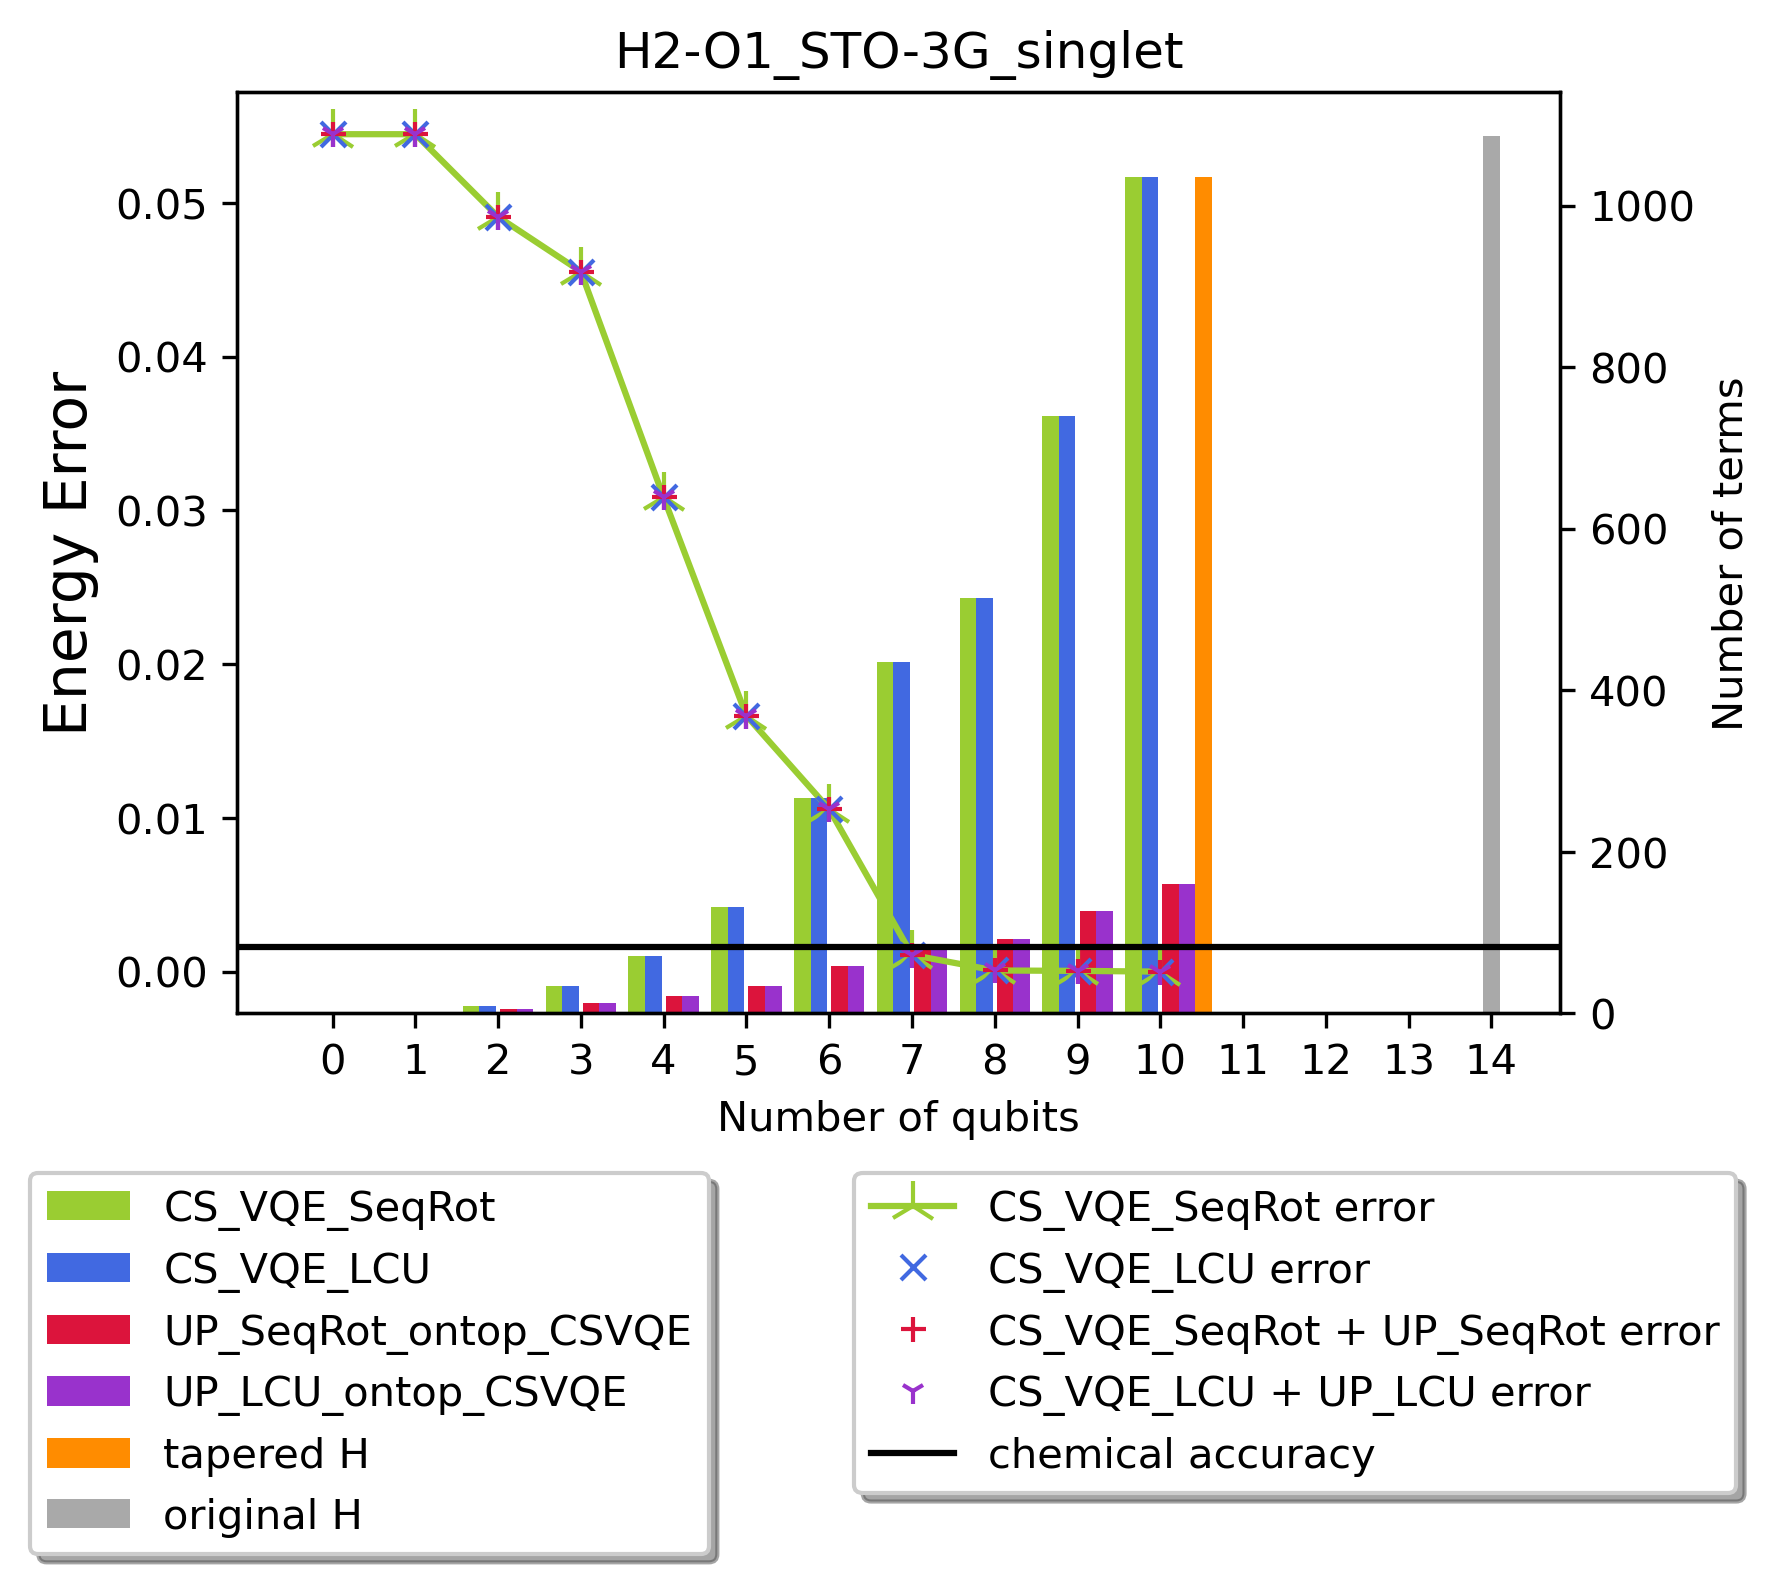

In [256]:
# calc still running on supercomputer! 
mol = 'H2-O1_STO-3G_singlet'
plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                        mol,
                       dpi=300)

In [196]:
mol = 'H1-F1_3-21G_singlet'
res = myriad_UP_LCU_on_CSVQE_LCU[mol]
res2= myriad_UP_SeqRot_on_CSVQE_SeqRot[mol]
True_gs_energy = myriad_CS_VQE_LCU_results[mol]['exp_conditions']['true_gs']

In [188]:
True_gs_energy

-104.66741826733657

In [195]:
abs(res[16]['E']-True_gs_energy)#<1.6e-3

0.0016779052010633677

In [199]:
res2.keys()

dict_keys([12, 5, 13, 8, 7, 6, 0, 1, 2, 4, 9, 3, 11, 10])

In [200]:
abs(res2[13]['E']-True_gs_energy)<1.6e-3

False

In [206]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H3-N1_STO-3G_singlet'].keys()

dict_keys([8, 0, 6, 12, 3, 9, 11, 5, 4, 2, 10, 1, 7])

In [207]:
myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet']['exp_conditions']['removal_order']

[9, 8, 12, 5, 2, 7, 6, 1, 0, 4, 3, 10, 11]

In [208]:
myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet']['exp_conditions']['removal_order']

[9, 8, 12, 5, 2, 7, 6, 1, 0, 4, 3, 10, 11]

In [209]:
myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['model_CSVQE'][1]

['XZZZZXZIIIIII', 'IIIIIZIIIIIII']

In [224]:
len(myriad_UP_LCU_on_CSVQE_LCU['H3-N1_STO-3G_singlet'][11]['AC_sets'])

181

In [223]:
len(myriad_UP_SeqRot_on_CSVQE_SeqRot['H3-N1_STO-3G_singlet'][11]['AC_sets'])

182

In [248]:
from functools import reduce
SEQ = reduce(lambda x, y: x+y, myriad_UP_SeqRot_on_CSVQE_SeqRot['H3-N1_STO-3G_singlet'][11]['AC_sets'].values())
SEQ = reduce(lambda x, y: x+y, SEQ)

LCU = reduce(lambda x, y: x+y, list(myriad_UP_LCU_on_CSVQE_LCU['H3-N1_STO-3G_singlet'][11]['AC_sets'].values()))
LCU = reduce(lambda x, y: x+y, LCU)

In [249]:
SEQ == LCU

True

In [234]:
HH1_mat = qubit_operator_sparse(LCU)
HH2_mat = qubit_operator_sparse(SEQ)
sparse_allclose(HH1_mat, HH2_mat)

TypeError: Operator of invalid type.

In [212]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H1-He1_3-21G_singlet_1+'][1]['AC_sets']

{0: [-3.0935343311313326 []],
 1: [1.1421456535807015 [Z0], -0.10354696914008185 [X0]]}

In [213]:
myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions'].keys()
model = myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['model_CSVQE']
fn_form =  myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['fn_form_CSVQE']
ground_state_params = myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['gstate_noncon']

In [77]:
Rotations_list, diagonalized_generators_GuA, eigen_vals_nonC_ground_state_GuA_ops = diagonalize_epistemic(model,
                                                                                                            fn_form,
                                                                                                            ground_state_params)

In [112]:
diagonalized_generators_GuA[-1]

'IIIIIZIIIIIII'

In [172]:
import quchem.Misc_functions.conversion_scripts as conv_scr 
from openfermion import qubit_operator_sparse

In [216]:
HH1 = conv_scr.Get_Openfermion_Hamiltonian(myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet'][11]['H'])
HH2 = conv_scr.Get_Openfermion_Hamiltonian(myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet'][11]['H'])

HH1_mat = qubit_operator_sparse(HH1)
HH2_mat = qubit_operator_sparse(HH2)

In [219]:
# len(myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet'][11]['H'])
len(myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet'][11]['H'])

1373

In [217]:
from quchem.Misc_functions.Misc_functions import sparse_allclose
sparse_allclose(HH1_mat, HH2_mat)

True

In [175]:
x, y = np.where(HH1_mat.todense()!= HH2_mat.todense())

In [176]:
x

array([   0,    0,    0, ..., 1023, 1023, 1023])

In [177]:
HH1_mat[0,1]

0j

In [178]:
Threshold = 1e-7
newH1 = {P: coeff for P, coeff in myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet'][9]['H'].items() if np.abs(coeff)>Threshold}
newH2 = {P: coeff for P, coeff in myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet'][9]['H'].items() if np.abs(coeff)>Threshold}

In [179]:
newH1.keys() == newH2.keys()

True

In [180]:
HH1 = conv_scr.Get_Openfermion_Hamiltonian(newH1)
HH2 = conv_scr.Get_Openfermion_Hamiltonian(newH2)

HH1_mat = qubit_operator_sparse(HH1)
HH2_mat = qubit_operator_sparse(HH2)
sparse_allclose(HH1_mat, HH2_mat)

True

In [182]:
x, y = np.where(HH1_mat.todense()!= HH2_mat.todense())

In [183]:
for x1, y1 in zip(x,y):
    if not np.isclose(HH1_mat[x1, y1], HH2_mat[x1, y1]):
        print(HH1_mat[x1, y1]-HH2_mat[x1, y1])

In [148]:
len(newH2)

1097